# Analyzing Marketing Campaign Effectiveness: An EDA Approach

### Project Overview
As a marketing analyst, we've been told by the Chief Marketing Officer that recent
marketing campaigns have not been as effective as they were expected to be. We need to
analyze the data set to understand this problem and propose data-driven solutions.

The data set consists of 2206 customers of XYZ company with data on:
- Customer profiles
- Product preferences
- Campaign successes/failures
- Channel performance

Column Details:
- ID: Customer's Unique Identifier
- Year_Birth: Customer's Birth Year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- MntWines: Amount spent on wine in the last 2 years
- MntFruits: Amount spent on fruits in the last 2 years
- MntMeatProducts: Amount spent on meat in the last 2 years
- MntFishProducts: Amount spent on fish in the last 2 years
- MntSweetProducts: Amount spent on sweets in the last 2 years
- MntGoldProds: Amount spent on gold in the last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- NumWebPurchases: Number of purchases made through the company's web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company's web site in the last month
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain: 1 if customer complained in the last 2 years, 0 otherwise
- Country: Customer's location

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/Users/samiashaukat/Documents/AtomCamp DS BC/Python /EDA port project ifood_df_raw - ifood_df_raw.csv')

## Data Cleaning and Preprocessing

In [ ]:
df.head()

ID  Year_Birth   Education Marital_Status       Income  Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0             0             0   
1                  5             0             0             0             0   
2                  2             0             0             0             0   
3                  7             0             0             0             0   
4                  7             1             0             0             0   

   AcceptedCmp2  Response  Complain  Country  
0             0         1         0       SP  
1             1         1         0       CA  
2             0         0         0       US  
3             0         0         0      AUS  
4             0         1         0       SP  

[5 rows x 28 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2238 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2238 non-null   int64         
 1   Year_Birth           2238 non-null   int64         
 2   Education            2238 non-null   object        
 3   Marital_Status       2238 non-null   object        
 4   Income               2238 non-null   float64       
 5   Kidhome              2238 non-null   int64         
 6   Teenhome             2238 non-null   int64         
 7   Dt_Customer          2238 non-null   datetime64[ns]
 8   Recency              2238 non-null   int64         
 9   MntWines             2238 non-null   int64         
 10  MntFruits            2238 non-null   int64         
 11  MntMeatProducts      2238 non-null   int64         
 12  MntFishProducts      2238 non-null   int64         
 13  MntSweetProducts     2238 non-null   i

In [ ]:
df.describe()

ID   Year_Birth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumCatalogPurchases  NumStorePurchases  \
count       2240.000000  ...          2240.000000        2240.000000   
mean          27.062946  ...             2.662054           5.790179   
std           41.280498  ...             2.923101           3.250958   
min            0.000000  ...             0.000000           0.000000   
25%            1.000000  ...             0.000000           3.000000   
50%            8.000000  ...             2.000000           5.000000   
75%           33.000000  ...             4.000000           8.000000   
max          263.000000  ...            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Response     Complain  
count   2240.000000   2240.000000  2240.000000  2240.000000  
mean       0.064286      0.013393     0.149107     0.009375  
std        0.245316      0.114976     0.356274     0.096391  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000  

[8 rows x 23 columns]

In [ ]:
df.describe(include = object)

Education Marital_Status      Income Dt_Customer Country
count         2240           2240        2216        2240    2240
unique           5              8        1974         663       8
top     Graduation        Married  $7,500.00      8/31/12      SP
freq          1127            864          12          12    1095

In [ ]:
# Round income values to the nearest whole number
df['Income'] = df['Income'].round()
# Replace commas in the income column and convert to float
df['Income'] = df['Income'].replace('[\$,]', '', regex=True).astype(float)

df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0            0     6/16/14        0       189  ...                  6   
1            0     6/15/14        0       464  ...                  7   
2            1     5/13/14        0       134  ...                  5   
3            1     5/11/14        0        10  ...                  2   
4            0      4/8/14        0         6  ...                  2   
...        ...         ...      ...       ...  ...                ...   
2235         1      3/7/13       99       372  ...                 11   
2236         0     1/22/13       99         5  ...                  3   
2237         0     12/3/12       99       185  ...                  5   
2238         0    11/29/12       99       267  ...                 10   
2239         2      9/1/12       99       169  ...                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     1             0             0             0   
1                     5             0             0             0   
2                     2             0             0             0   
3                     7             0             0             0   
4                     7             1             0             0   
...                 ...           ...           ...           ...   
2235                  4             0             0             0   
2236                  8             0             0             0   
2237                  8             0             0             0   
2238                  3             0             0             0   
2239                  7             0             1             1   

      AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  
0                0             0         1         0       SP  
1                0             1         1         0       CA  
2                0             0         0         0       US  
3                0             0         0         0      AUS  
4                0             0         1         0       SP  
...            ...           ...       ...       ...      ...  
2235             0             0         0         0       US  
2236             0             0         0         0       SP  
2237             0             0         0         0       SP  
2238             0             0         0         0      IND  
2239             0             0         1         0       CA  

[2240 rows x 28 columns]

In [ ]:
from datetime import datetime
from datetime import date

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')
df['Dt_Customer']

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2235   2013-03-07
2236   2013-01-22
2237   2012-12-03
2238   2012-11-29
2239   2012-09-01
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [ ]:
df['Year'] = pd.to_datetime(df['Dt_Customer']).dt.year
df['Month'] = pd.to_datetime(df['Dt_Customer']).dt.month
df['Day'] = pd.to_datetime(df['Dt_Customer']).dt.day
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0  2014-06-16        0       189  ...             0             0   
1  2014-06-15        0       464  ...             0             0   
2  2014-05-13        0       134  ...             0             0   
3  2014-05-11        0        10  ...             0             0   
4  2014-04-08        0         6  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  Year  Month  Day  
0             0             0         1         0       SP  2014      6   16  
1             0             1         1         0       CA  2014      6   15  
2             0             0         0         0       US  2014      5   13  
3             0             0         0         0      AUS  2014      5   11  
4             0             0         1         0       SP  2014      4    8  

[5 rows x 31 columns]

In [ ]:
df.columns.values

array(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response',
       'Complain', 'Country', 'Year', 'Month', 'Day'], dtype=object)

In [ ]:
# Function to strip white spaces from string columns
def strip_whitespace(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.strip()

# Apply the function to the DataFrame
strip_whitespace(df)

df.columns.values

array(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response',
       'Complain', 'Country', 'Year', 'Month', 'Day'], dtype=object)

In [ ]:
df['Country'].value_counts()

Country
SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: count, dtype: int64

In [ ]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [ ]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')
df['Marital_Status'] = df['Marital_Status'].replace('YOLO', 'Single')

In [ ]:
df = df[df['Marital_Status'] != 'Absurd']

In [ ]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      485
Divorced    232
Widow        77
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
Year                    0
Month                   0
Day                     0
dtype: int64

In [ ]:
# Calculate mean income by education level
mean_income_by_education = df.groupby('Education')['Income'].mean()

# Impute missing income values based on the mean income by education level
def impute_income_by_education(row):
    if pd.isnull(row['Income']):
        return mean_income_by_education[row['Education']]
    else:
        return row['Income']

df['Income'] = df.apply(impute_income_by_education, axis=1)

In [ ]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
Year                   0
Month                  0
Day                    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

## Outliers Detection and Treatment

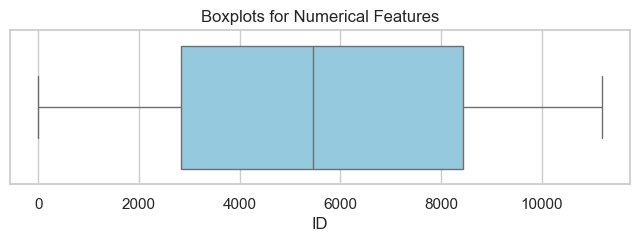

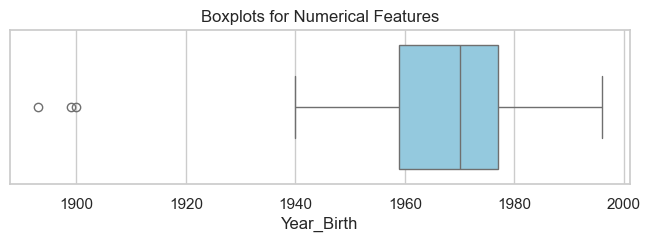

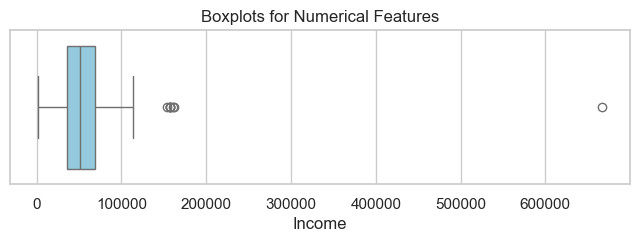

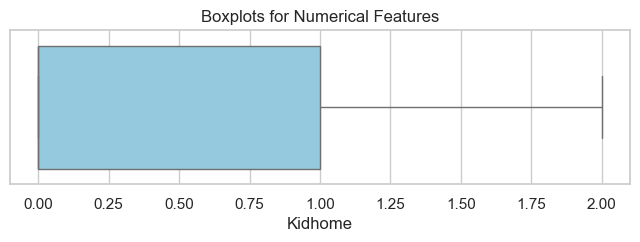

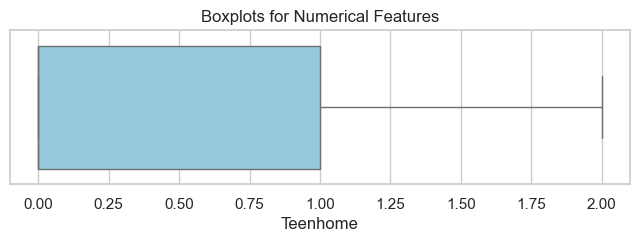

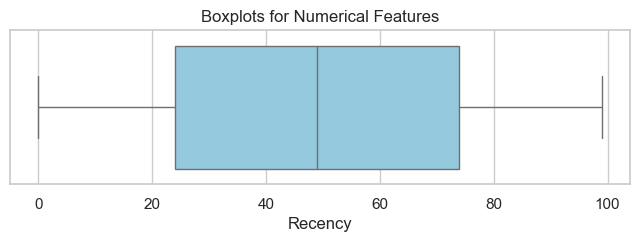

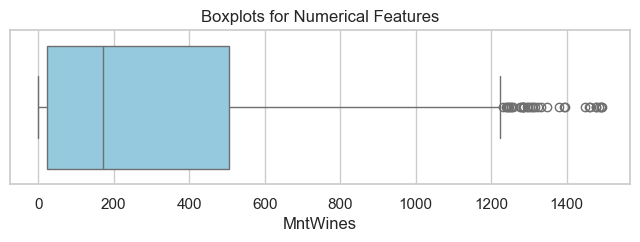

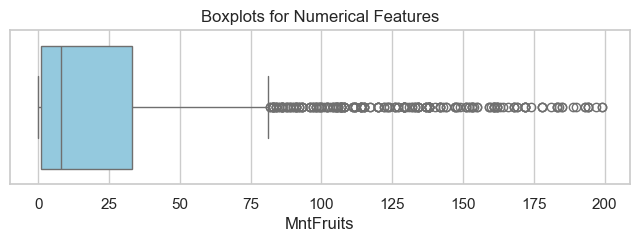

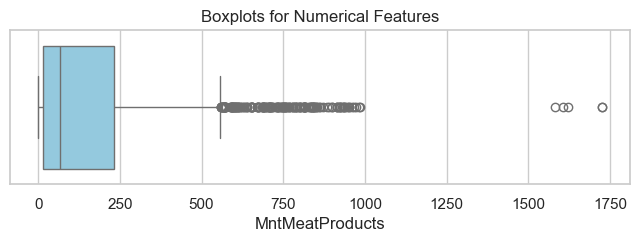

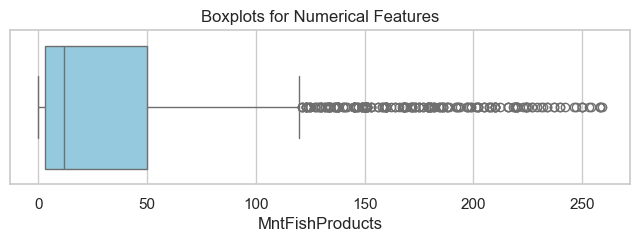

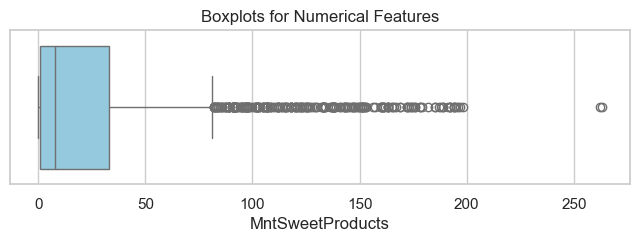

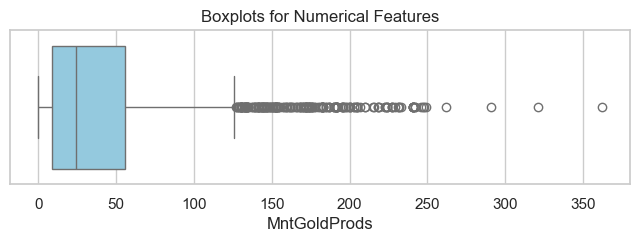

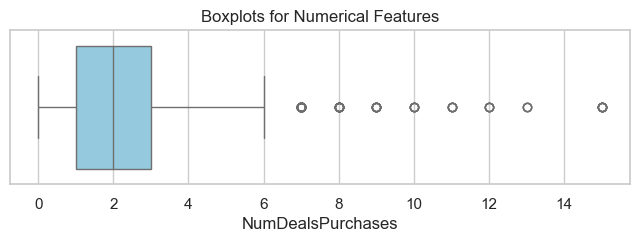

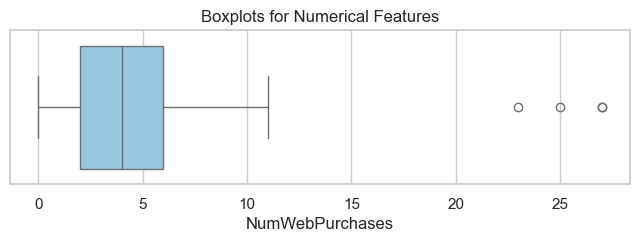

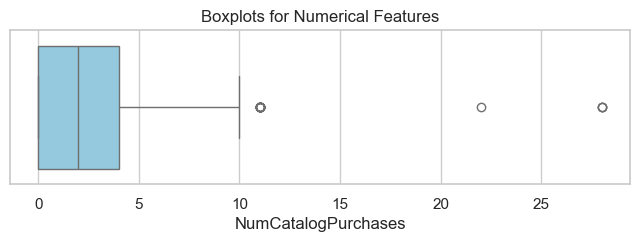

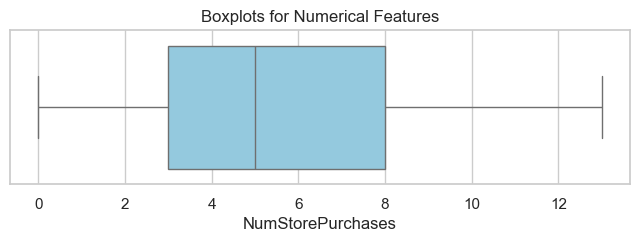

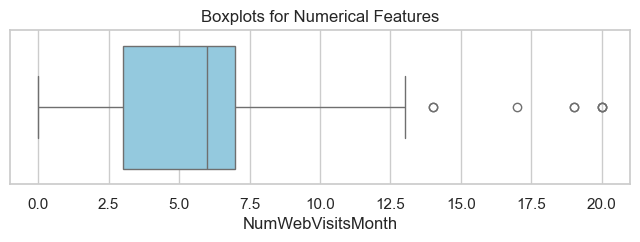

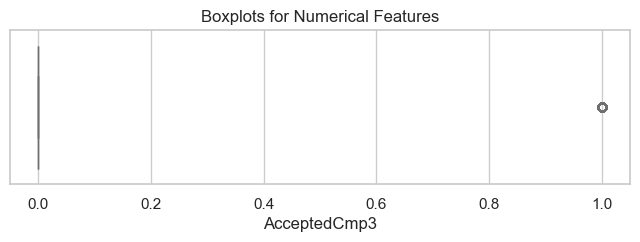

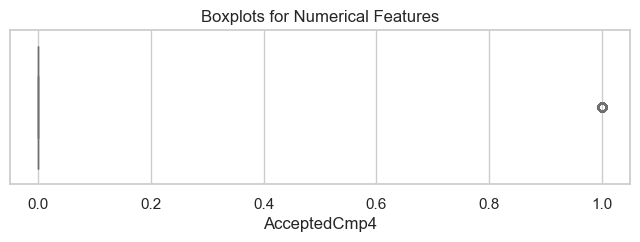

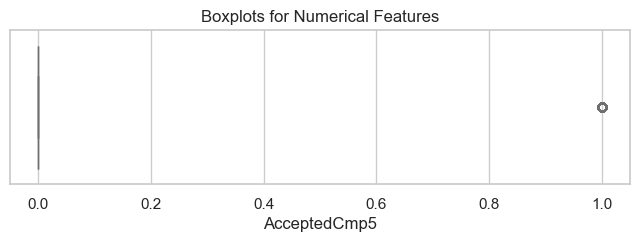

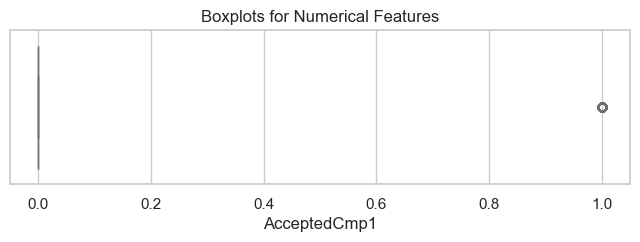

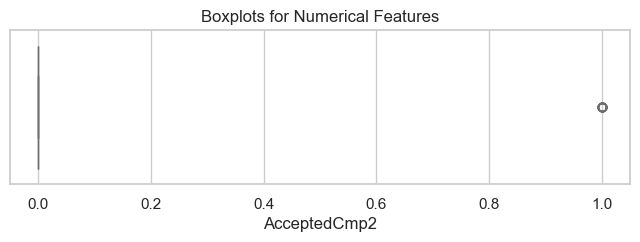

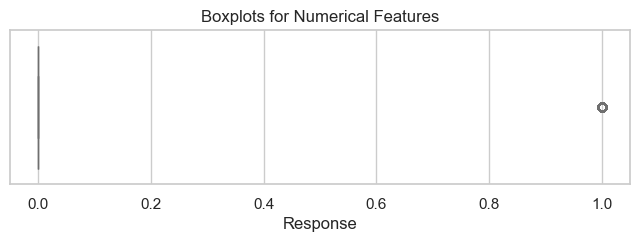

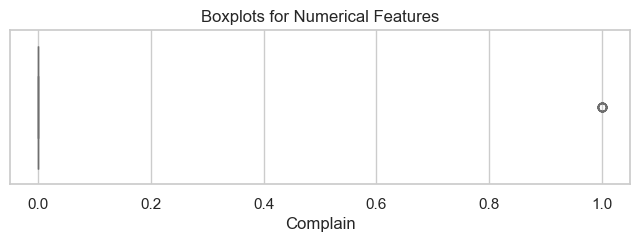

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[column], color="skyblue")
    plt.title('Boxplots for Numerical Features')
    plt.xlabel(column)
    plt.show()

### General Overview
- Age Distribution: The data contains a mix of individuals from various age groups, with a concentration in the mid-20th century. A few outliers on the lower end suggest some individuals were born significantly earlier than the majority.
- Income Inequality: The income distribution is highly skewed, suggesting significant income inequality within the dataset. A few outliers on the higher end represent individuals with exceptionally high incomes.
- Family Structure: A large proportion of individuals in the dataset have no children.
- Teenhome: A large majority of households have no teenagers.
- Recency: Customers have a moderate level of recency, with a few outliers indicating recent large purchases.

### Spending Patterns
- Product Preferences: Customers tend to make smaller purchases of MntFruits, MntWines and MntSweetProducts compared to MntMeatProducts and MntGoldProds. This suggests that meat and gold products might be more popular or have higher average prices.
- Spending Variability: The distribution of spending for MntFruits, MntWines and MntSweetProducts is highly skewed, indicating a significant portion of customers make minimal purchases while a smaller proportion make unusually large purchases. MntMeatProducts and MntGoldProds have a more moderate skew, suggesting a wider range of spending patterns.

### Purchase Behavior
- NumStorePurchases: A moderate number of in-store purchases, with a few outliers indicating high-spending customers.
- NumWebPurchases: A moderate number of website purchases, with a few outliers suggesting high-engagement online shoppers.
- NumCatalogPurchases: A concentration of low catalog purchases, with a few outliers indicating potential catalog enthusiasts.
- NumDealsPurchases: A similar pattern to NumCatalogPurchases, suggesting limited use of deals by most customers.
- NumWebVisitsMonth: A moderate number of website visits, with a few outliers indicating highly engaged customers.



In [ ]:
# Function to count outliers
def count_outliers_iqr(df):
    outliers_count = {}

    # Process numerical columns only
    numerical_cols = df.select_dtypes(include=[np.number])

    for column in numerical_cols.columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = numerical_cols[column].quantile(0.25)
        Q3 = numerical_cols[column].quantile(0.75)
        IQR = Q3 - Q1

        # Determine the outlier thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Store outliers in a dictionary
        outliers_count[column] = column_outliers

    return outliers_count

# Count outliers
outliers_count = count_outliers_iqr(df)

print("Number of outliers in each column:")
for column, outliers in outliers_count.items():
    print(f"{column}: {outliers.shape[0]} outliers")

Number of outliers in each column:
ID: 0 outliers
Year_Birth: 3 outliers
Income: 8 outliers
Kidhome: 0 outliers
Teenhome: 0 outliers
Recency: 0 outliers
MntWines: 35 outliers
MntFruits: 226 outliers
MntMeatProducts: 175 outliers
MntFishProducts: 221 outliers
MntSweetProducts: 248 outliers
MntGoldProds: 205 outliers
NumDealsPurchases: 86 outliers
NumWebPurchases: 4 outliers
NumCatalogPurchases: 23 outliers
NumStorePurchases: 0 outliers
NumWebVisitsMonth: 8 outliers
AcceptedCmp3: 163 outliers
AcceptedCmp4: 167 outliers
AcceptedCmp5: 162 outliers
AcceptedCmp1: 143 outliers
AcceptedCmp2: 30 outliers
Response: 333 outliers
Complain: 21 outliers
Year: 1049 outliers
Month: 0 outliers
Day: 0 outliers


In [ ]:
# Helper function to identify and remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from the Year_Birth column
df = remove_outliers_iqr(df, 'Year_Birth')

Removing outliers in the Year_Birth column is a reasonable decision because these outliers might represent errors or unreasonably old or young ages that don't make sense in the context of our analysis.

In [ ]:
# Helper function to identify and cap outliers using the IQR method
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: max(min(x, upper_bound), lower_bound))
    return df

# Cap outliers in the Income column
df = cap_outliers_iqr(df, 'Income')

# Checking the summary statistics after capping Income outliers
print(df['Income'].describe())

count      2235.000000
mean      51852.106307
std       20937.836418
min        1730.000000
25%       35482.000000
50%       51563.000000
75%       68277.500000
max      117470.750000
Name: Income, dtype: float64


Capping the outliers in the Income column is a good approach because it allows you to minimize the influence of extreme values without completely discarding any data. Income has a right-skewed distribution with a few very high values, so capping these at a reasonable threshold can help maintain the overall distribution.

In [ ]:
# List of columns for spending and purchase behavior
columns_to_cap = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                  'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth']

# Apply capping to these columns
for column in columns_to_cap:
    df = cap_outliers_iqr(df, column)


Capping outliers is a good way to manage the influence of high spenders and frequent purchasers without discarding valuable data.

In [ ]:
# Helper function to count outliers using the IQR method
def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# List of columns for which we want to count outliers
columns_to_check = ['Year_Birth', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                    'NumWebVisitsMonth']

# Dictionary to store the number of outliers for each column
outlier_counts = {}

# Count outliers for each specified column
for column in columns_to_check:
    outlier_count = count_outliers_iqr(df, column)
    outlier_counts[column] = outlier_count

# Display the outlier counts
for column, count in outlier_counts.items():
    print(f"Column: {column}, Outliers: {count}")

Column: Year_Birth, Outliers: 0
Column: Income, Outliers: 0
Column: MntWines, Outliers: 0
Column: MntFruits, Outliers: 0
Column: MntMeatProducts, Outliers: 0
Column: MntFishProducts, Outliers: 0
Column: MntSweetProducts, Outliers: 0
Column: MntGoldProds, Outliers: 0
Column: NumDealsPurchases, Outliers: 0
Column: NumWebPurchases, Outliers: 0
Column: NumCatalogPurchases, Outliers: 0
Column: NumWebVisitsMonth, Outliers: 0


## Feature Engineering

In [ ]:
df['Age'] = 2024 - df['Year_Birth']
df['Age']

0       54
1       63
2       66
3       57
4       35
        ..
2235    48
2236    47
2237    48
2238    46
2239    55
Name: Age, Length: 2235, dtype: int64

In [ ]:
age_bins = [25, 35, 45, 55, 65, 75, 85]
age_labels = ['25-35', '36-45', '46-55', '56-65', '66-75', '76-85']
df['Age_Range'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
df['Age_Range']

0       46-55
1       56-65
2       66-75
3       56-65
4       36-45
        ...  
2235    46-55
2236    46-55
2237    46-55
2238    46-55
2239    56-65
Name: Age_Range, Length: 2235, dtype: category
Categories (6, object): ['25-35' < '36-45' < '46-55' < '56-65' < '66-75' < '76-85']

In [ ]:
df['Revenue_Generated'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Revenue_Generated']

0        967.50
1        577.00
2        251.00
3         11.00
4         91.00
         ...   
2235     689.00
2236      55.00
2237     309.00
2238    1124.25
2239     993.00
Name: Revenue_Generated, Length: 2235, dtype: float64

In [ ]:
df['Total_Purchases'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df['Total_Purchases']

0       15.0
1       18.0
2       11.0
3        4.0
4        8.0
        ... 
2235    20.0
2236     5.0
2237    14.0
2238    20.0
2239    18.0
Name: Total_Purchases, Length: 2235, dtype: float64

In [ ]:
df['TotalAmount_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['TotalAmount_Spent']


0        967.50
1        577.00
2        251.00
3         11.00
4         91.00
         ...   
2235     689.00
2236      55.00
2237     309.00
2238    1124.25
2239     993.00
Name: TotalAmount_Spent, Length: 2235, dtype: float64

In [ ]:
marital_status_map = {'Divorced': 1, 'Single': 1, 'Married': 2, 'Together': 2, 'Widow': 1, 'YOLO': 1, 'Alone': 1, 'Absurd': 1}
df['Family_Size'] = df['Kidhome'] + df['Teenhome'] + df['Marital_Status'].map(marital_status_map)
df['Family_Size']

0       1
1       1
2       3
3       4
4       2
       ..
2235    2
2236    3
2237    2
2238    2
2239    4
Name: Family_Size, Length: 2235, dtype: int64

In [ ]:
df['TotalCampaignsAcc'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
df['TotalCampaignsAcc']

0       0
1       1
2       0
3       0
4       1
       ..
2235    0
2236    0
2237    0
2238    0
2239    2
Name: TotalCampaignsAcc, Length: 2235, dtype: int64

In [ ]:
education_map = {'Basic': 10, '2n Cycle': 12, 'Graduation': 16, 'Master': 18, 'PhD': 22}
df['Educational_Years'] = df['Education'].map(education_map)
df['Educational_Years']

0       16
1       16
2       16
3       16
4       16
        ..
2235    22
2236    12
2237    16
2238    16
2239    22
Name: Educational_Years, Length: 2235, dtype: int64

In [ ]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Month  Day  Age  Age_Range  \
0  2014-06-16        0     189.0  ...      6   16   54      46-55   
1  2014-06-15        0     464.0  ...      6   15   63      56-65   
2  2014-05-13        0     134.0  ...      5   13   66      66-75   
3  2014-05-11        0      10.0  ...      5   11   57      56-65   
4  2014-04-08        0       6.0  ...      4    8   35      36-45   

   Revenue_Generated  Total_Purchases  TotalAmount_Spent  Family_Size  \
0              967.5             15.0              967.5            1   
1              577.0             18.0              577.0            1   
2              251.0             11.0              251.0            3   
3               11.0              4.0               11.0            4   
4               91.0              8.0               91.0            2   

   TotalCampaignsAcc  Educational_Years  
0                  0                 16  
1                  1                 16  
2                  0                 16  
3                  0                 16  
4                  1                 16  

[5 rows x 39 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2235 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2235 non-null   int64         
 1   Year_Birth           2235 non-null   int64         
 2   Education            2235 non-null   object        
 3   Marital_Status       2235 non-null   object        
 4   Income               2235 non-null   float64       
 5   Kidhome              2235 non-null   int64         
 6   Teenhome             2235 non-null   int64         
 7   Dt_Customer          2235 non-null   datetime64[ns]
 8   Recency              2235 non-null   int64         
 9   MntWines             2235 non-null   float64       
 10  MntFruits            2235 non-null   float64       
 11  MntMeatProducts      2235 non-null   float64       
 12  MntFishProducts      2235 non-null   float64       
 13  MntSweetProducts     2235 non-null   f

## Exploratory Data Analysis

### Univariate Analysis

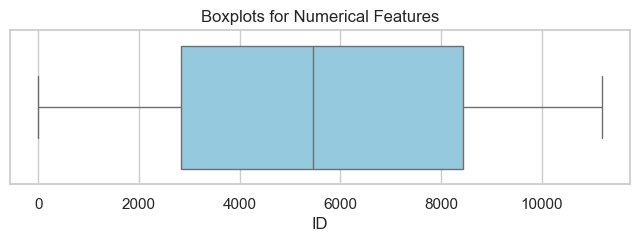

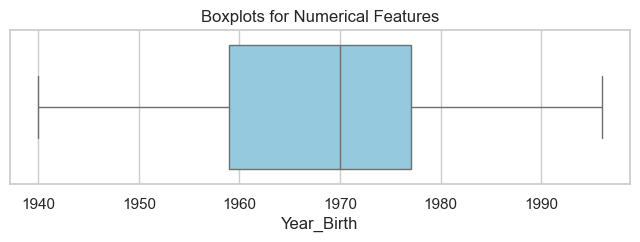

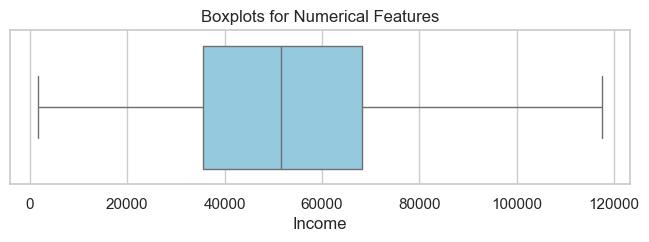

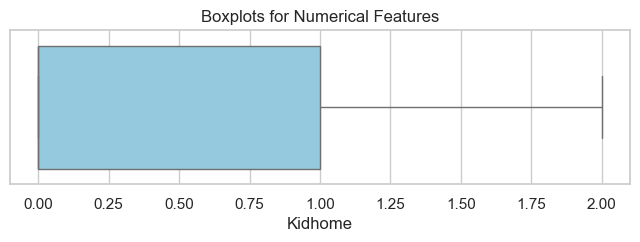

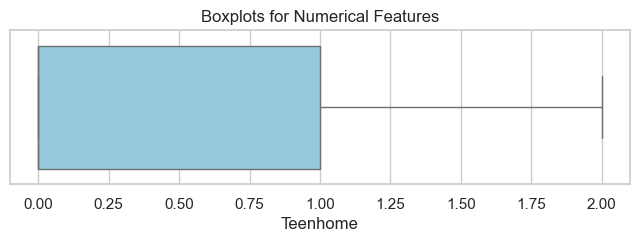

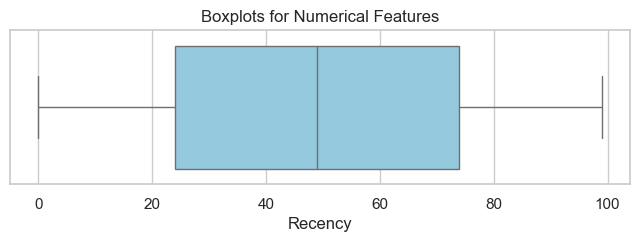

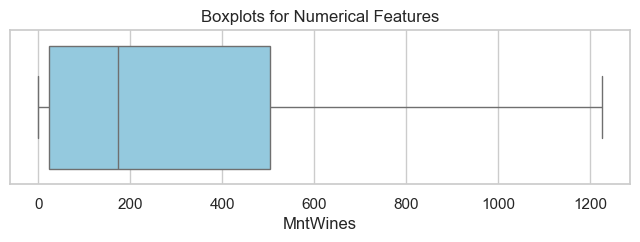

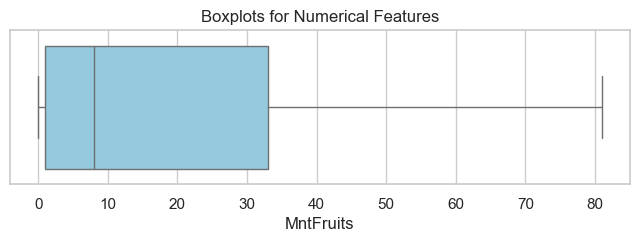

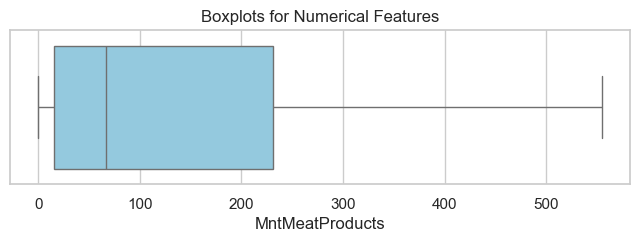

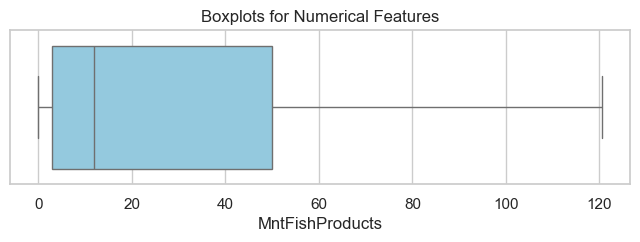

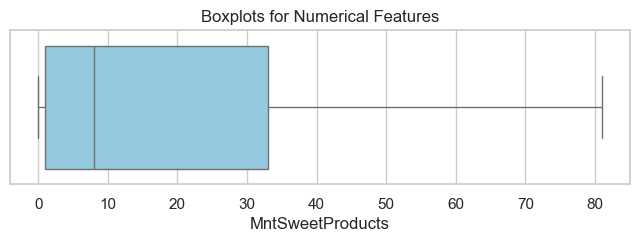

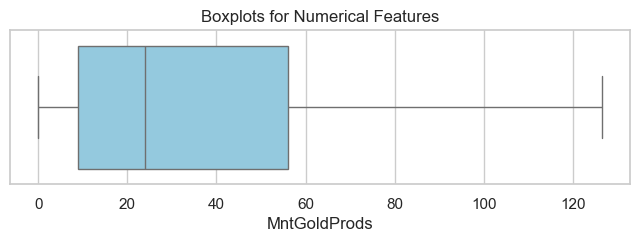

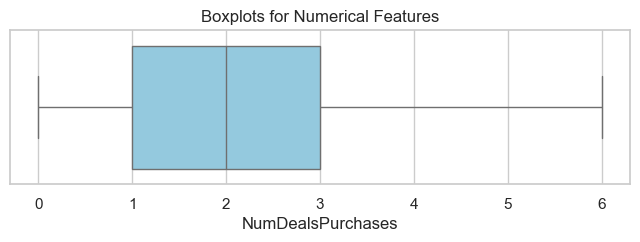

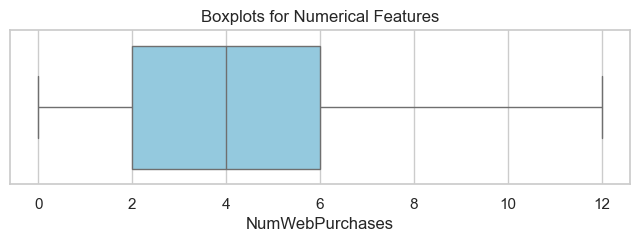

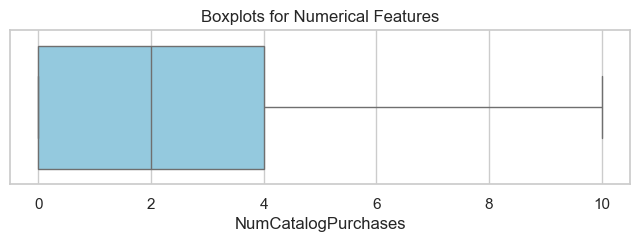

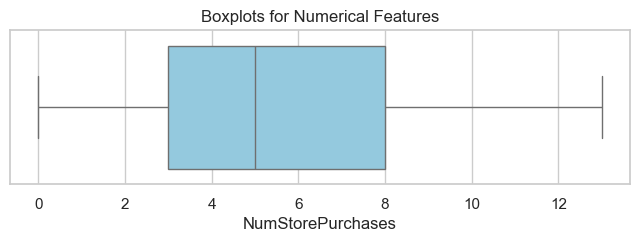

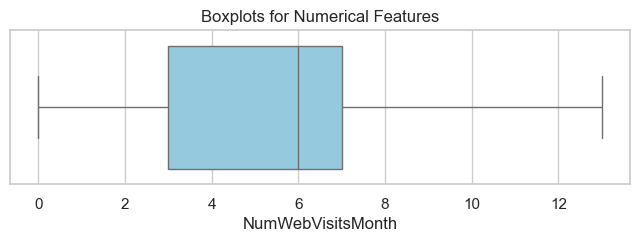

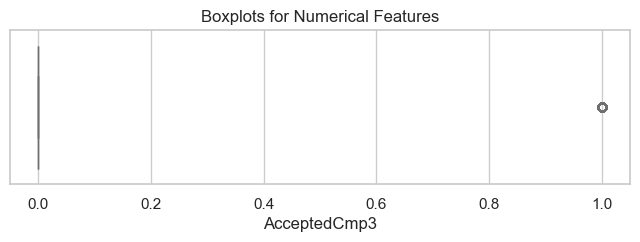

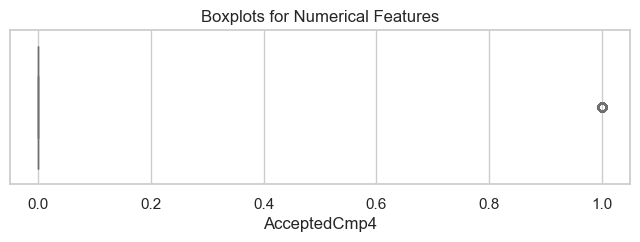

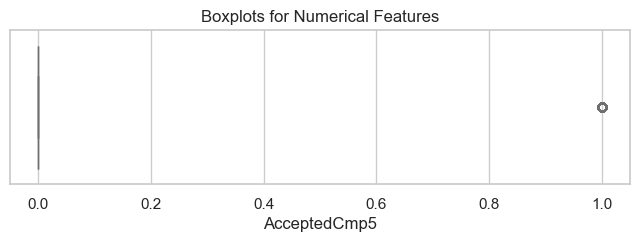

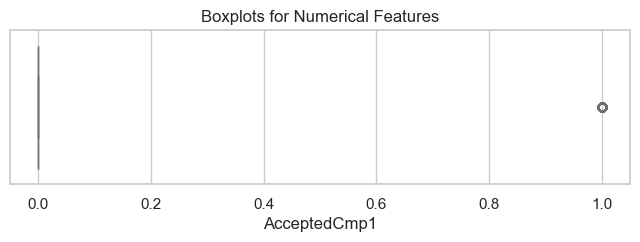

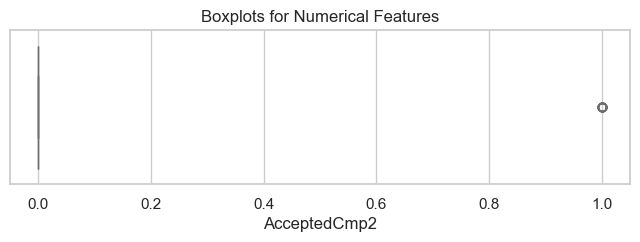

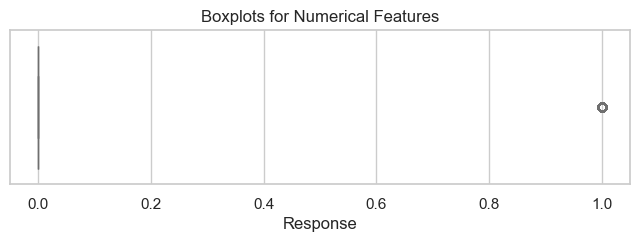

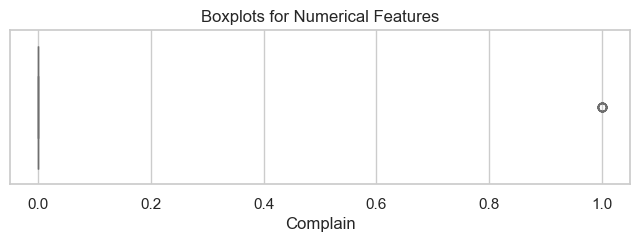

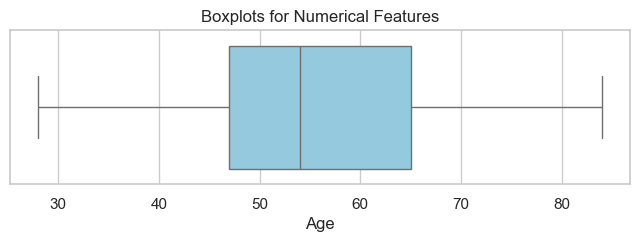

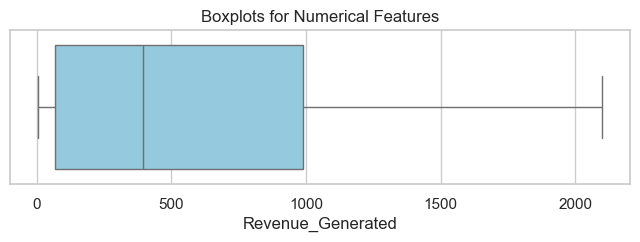

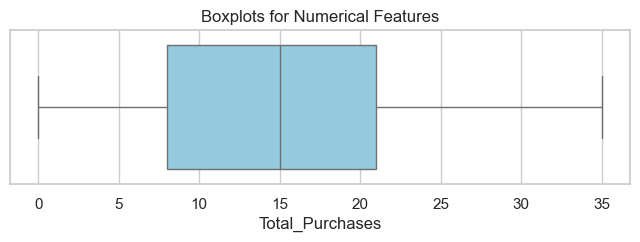

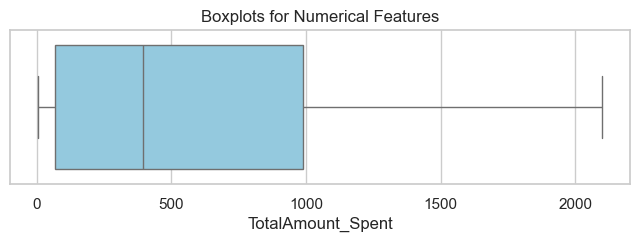

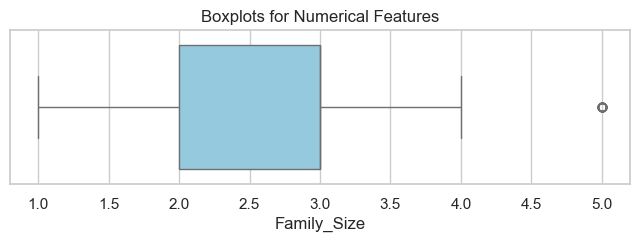

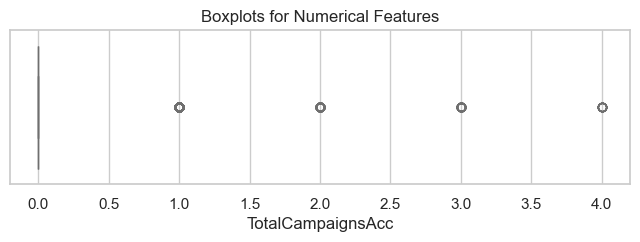

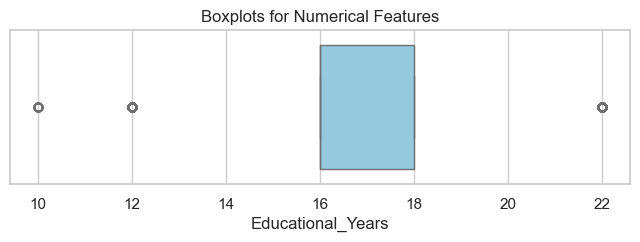

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[column], color="skyblue")
    plt.title('Boxplots for Numerical Features')
    plt.xlabel(column)
    plt.show()

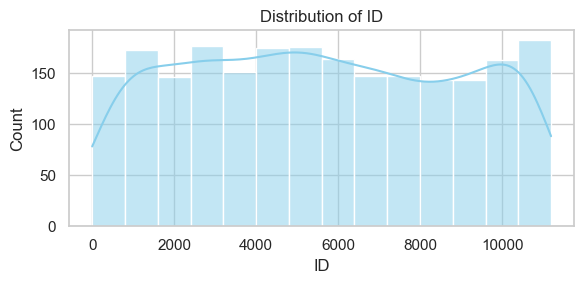

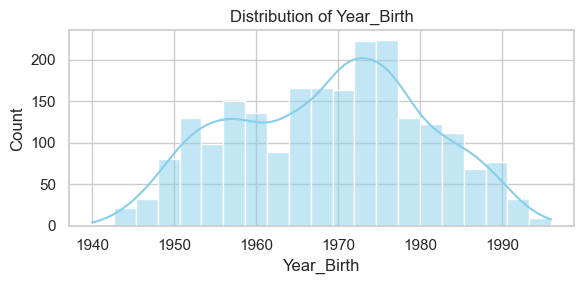

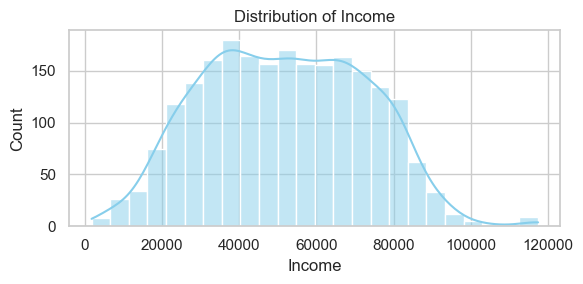

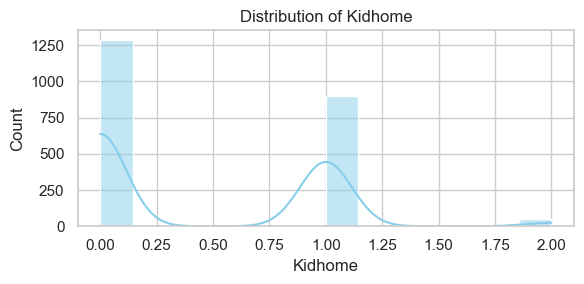

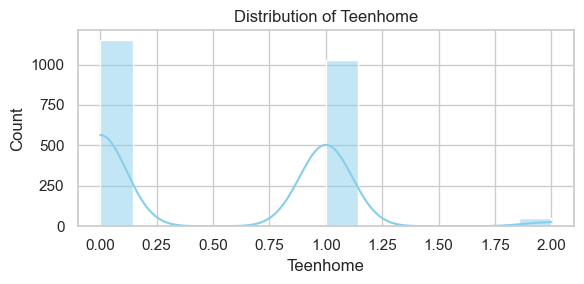

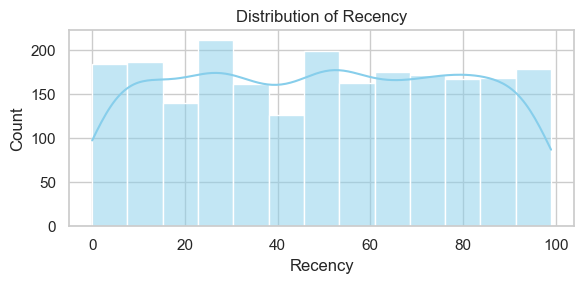

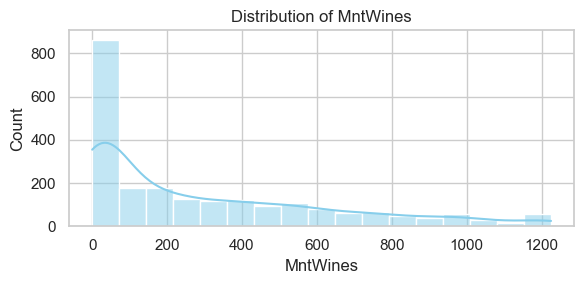

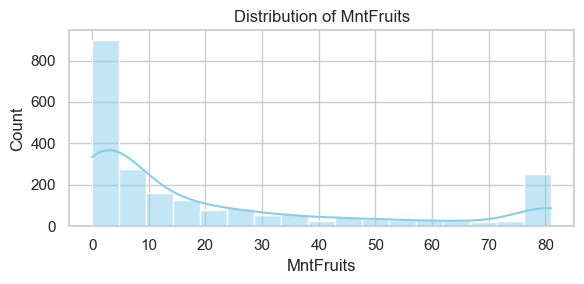

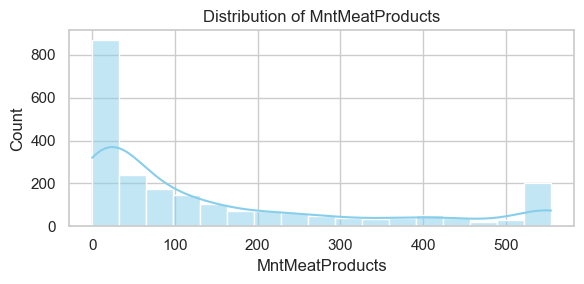

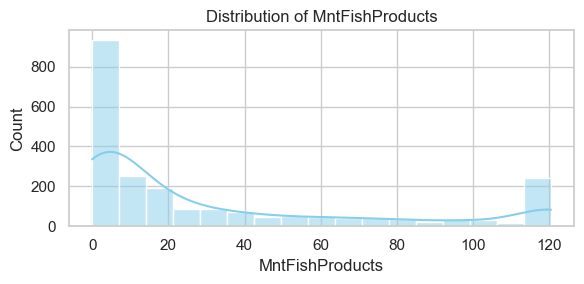

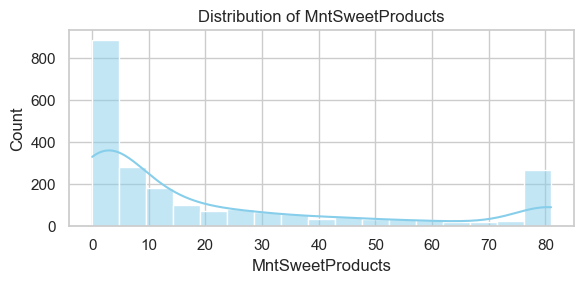

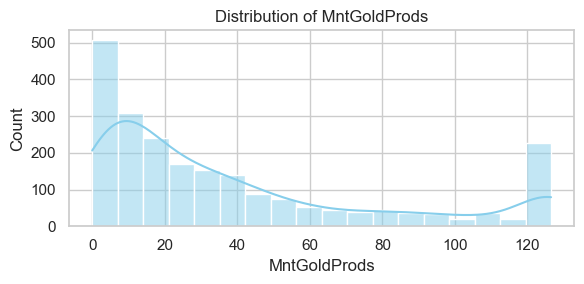

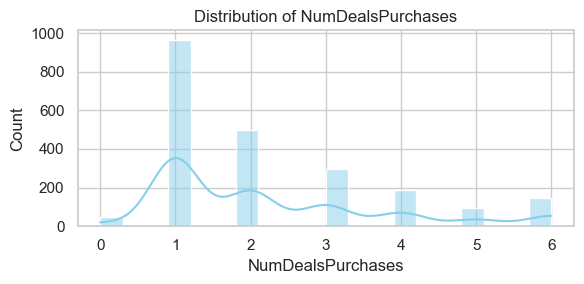

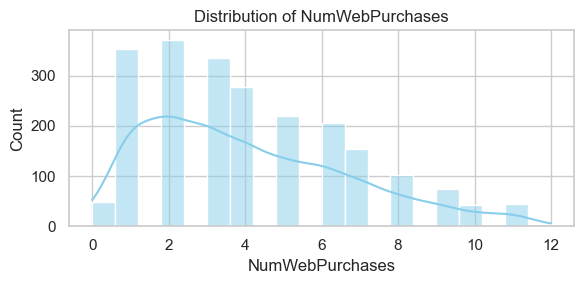

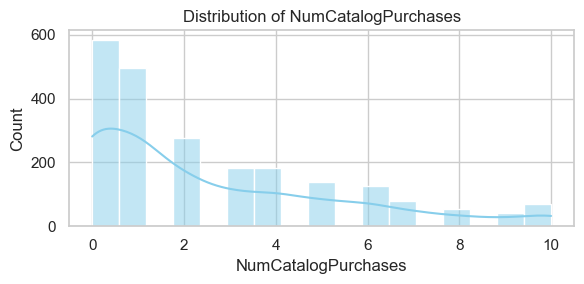

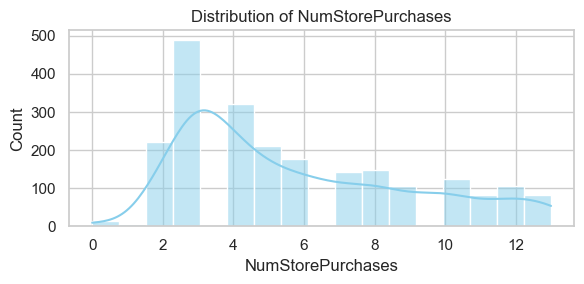

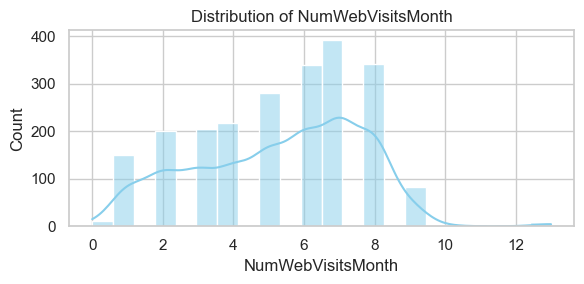

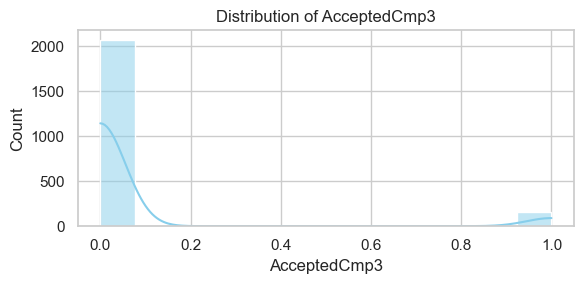

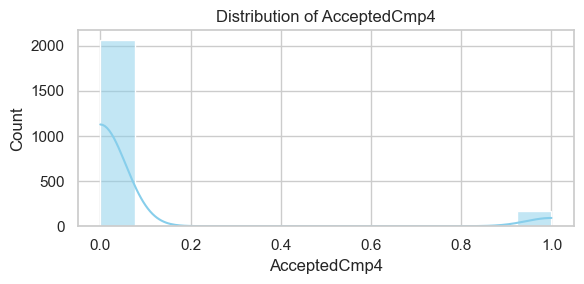

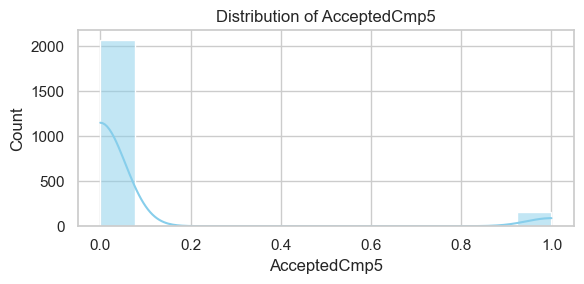

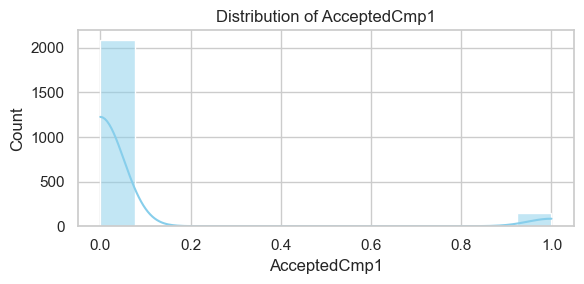

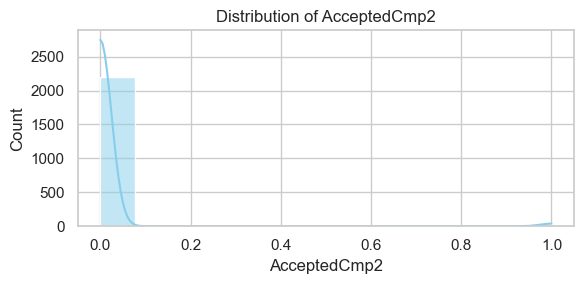

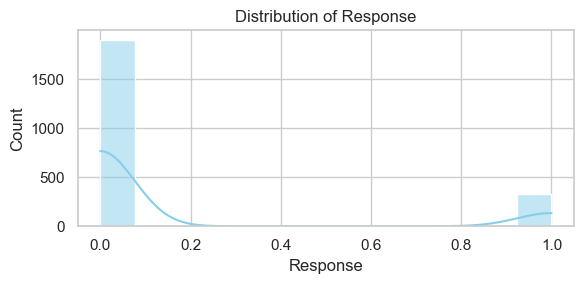

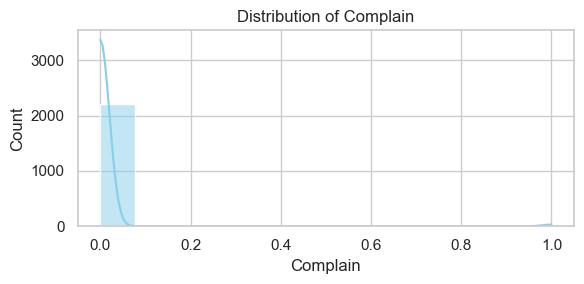

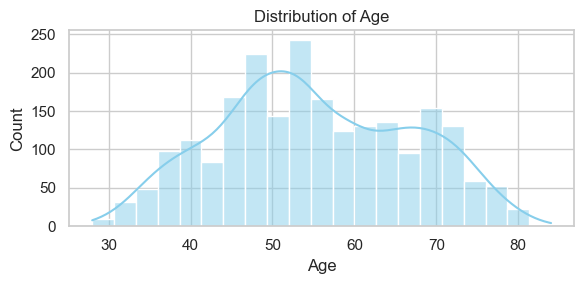

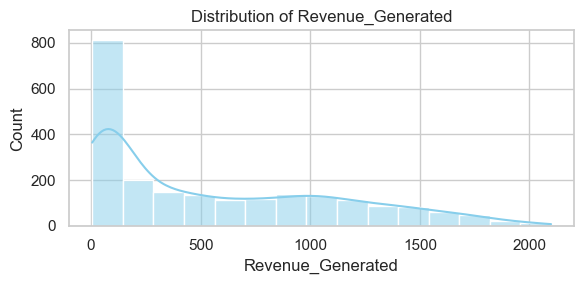

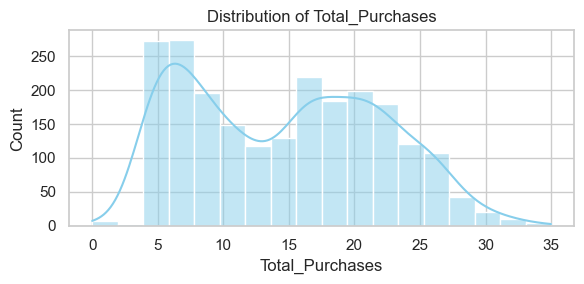

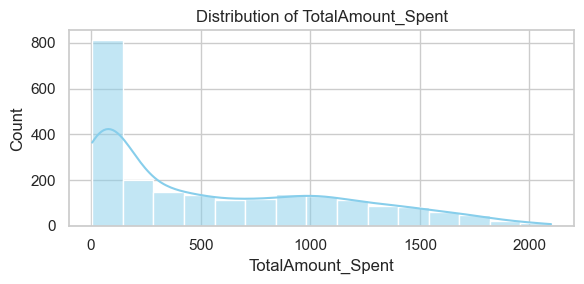

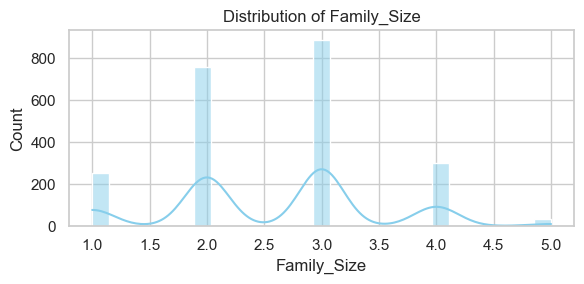

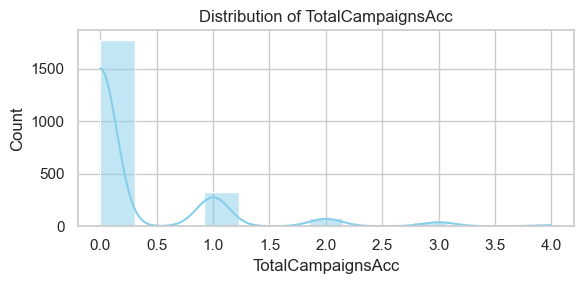

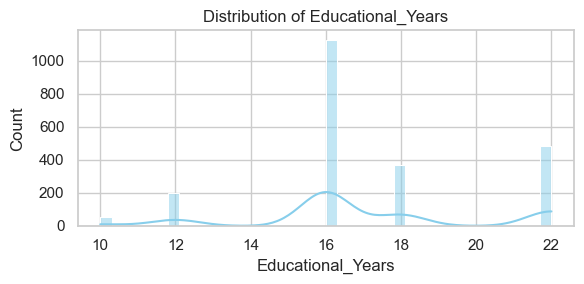

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[column], kde=True, color="skyblue")
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

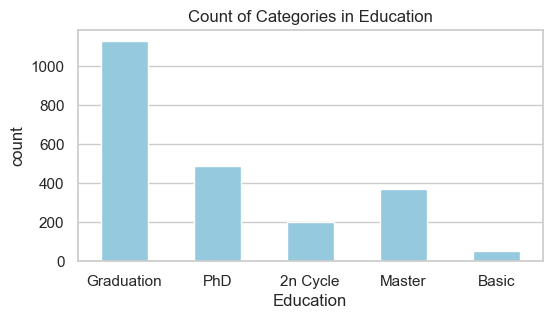

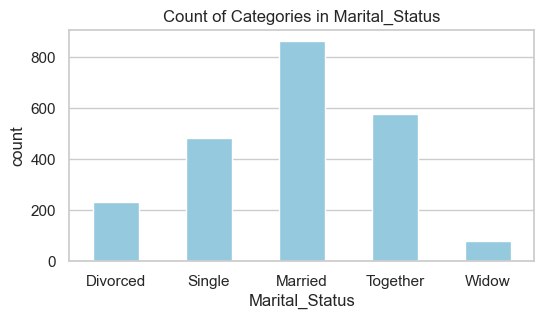

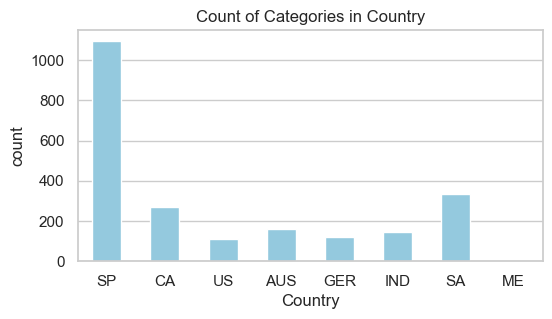

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=df[feature], width=0.5, color="skyblue")
    plt.title(f'Count of Categories in {feature}')
    plt.show()

### Bivariate Analysis

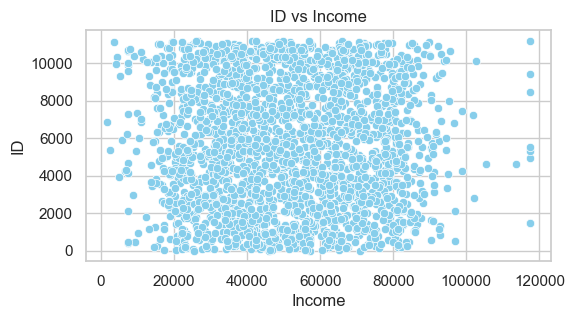

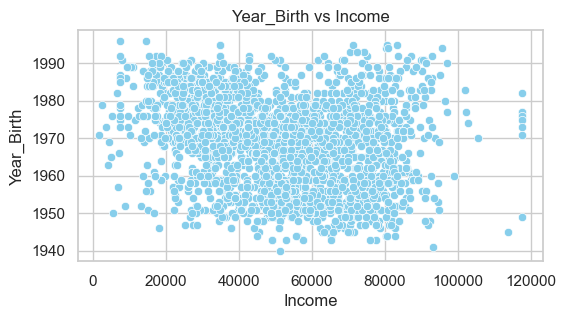

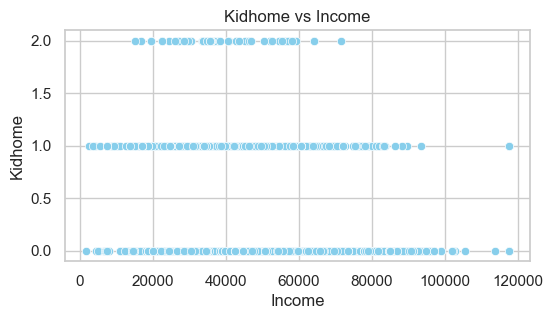

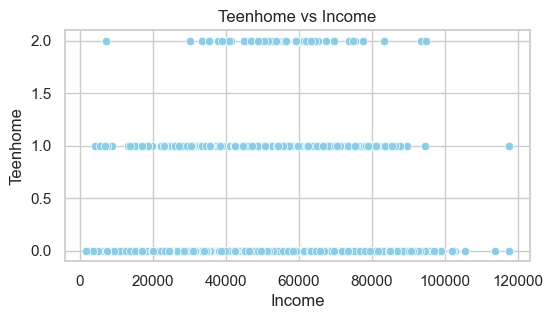

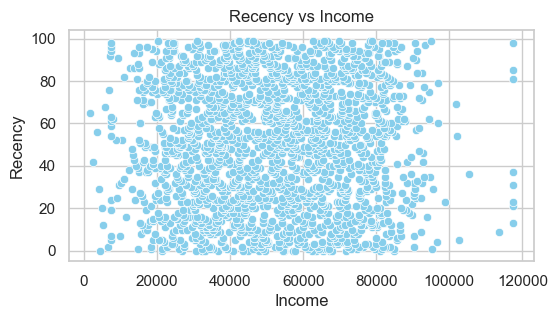

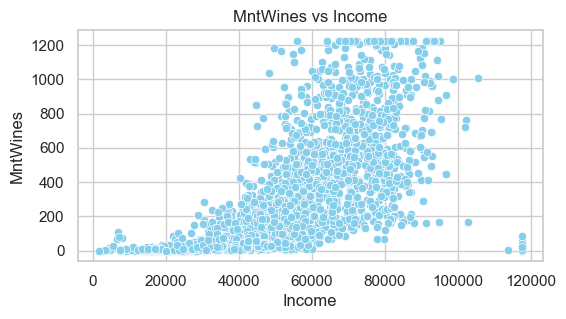

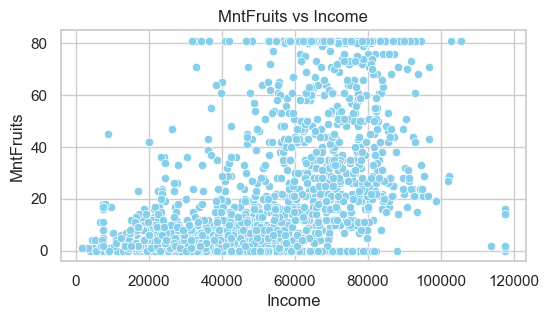

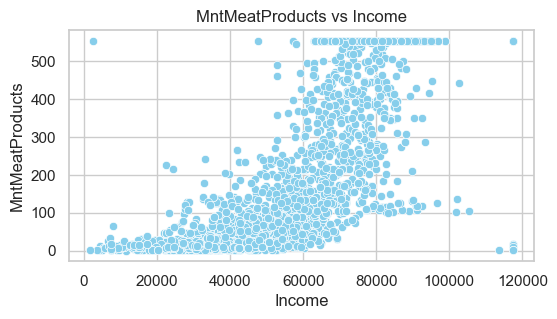

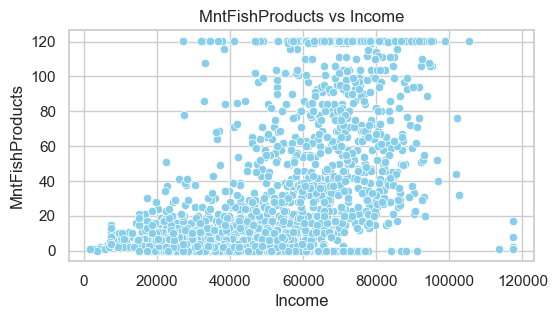

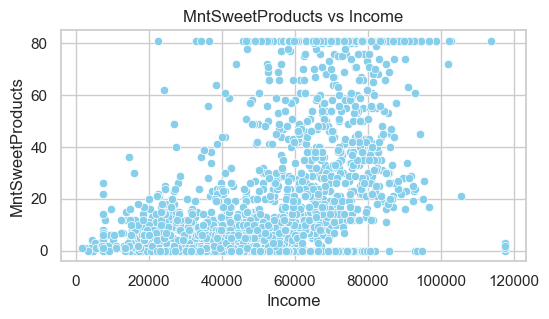

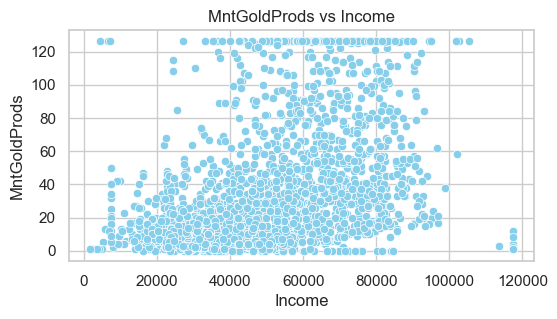

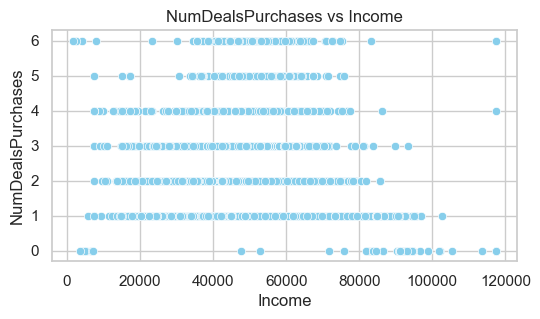

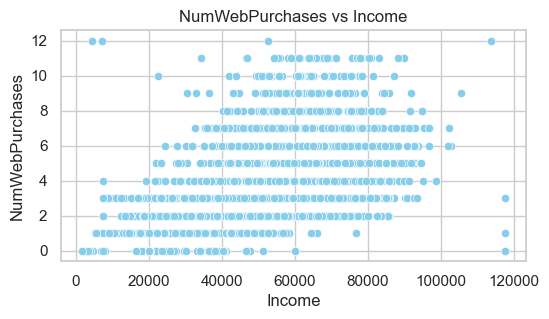

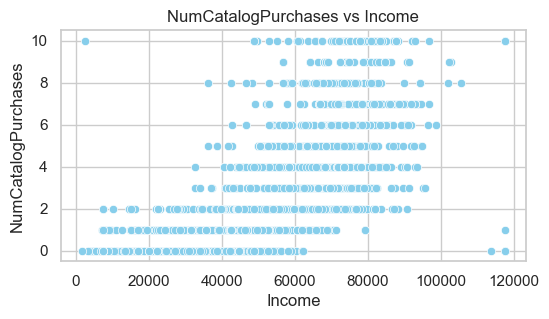

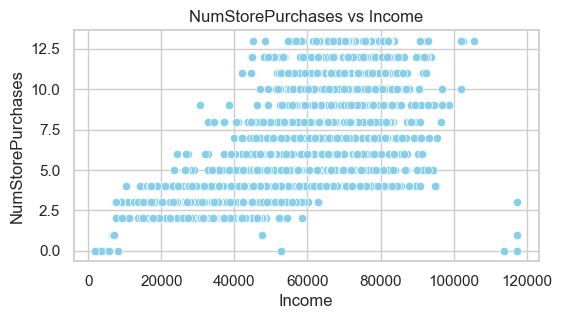

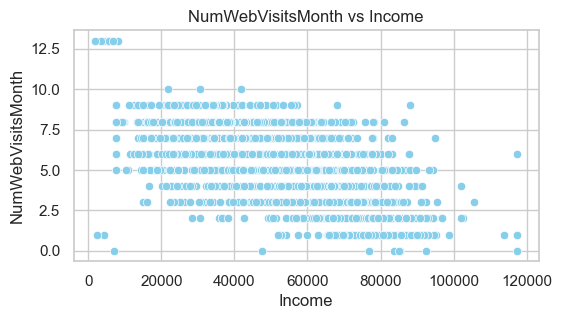

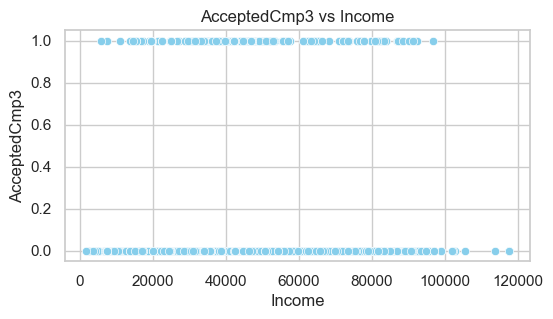

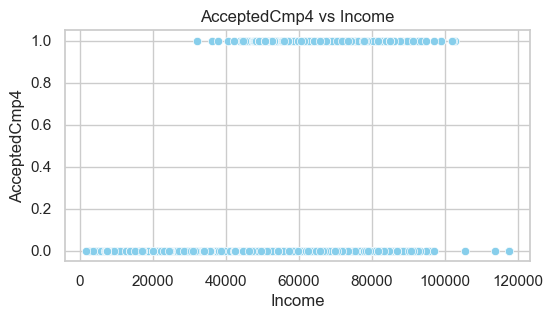

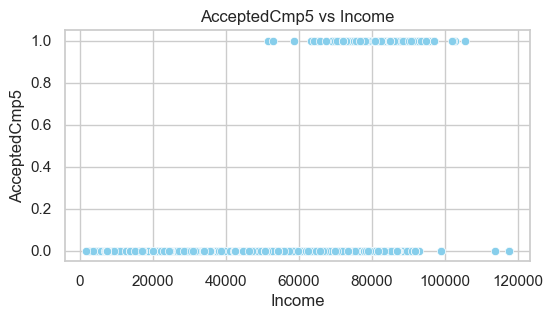

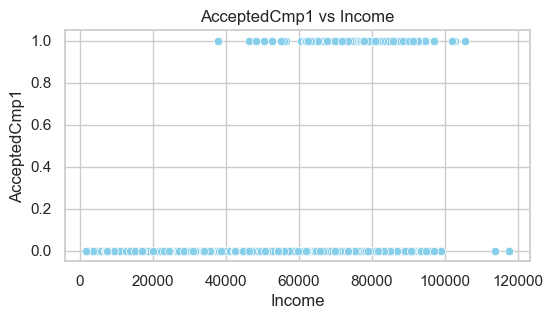

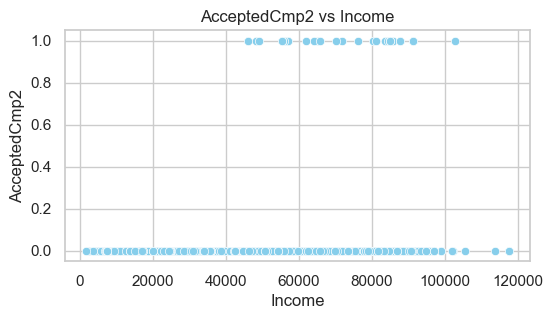

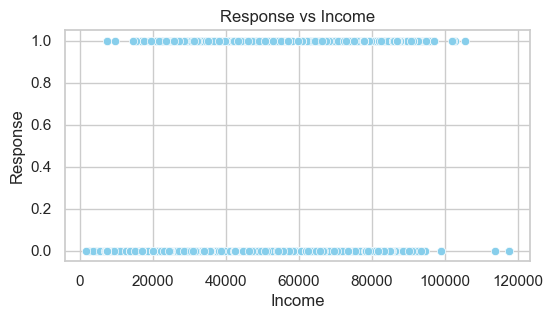

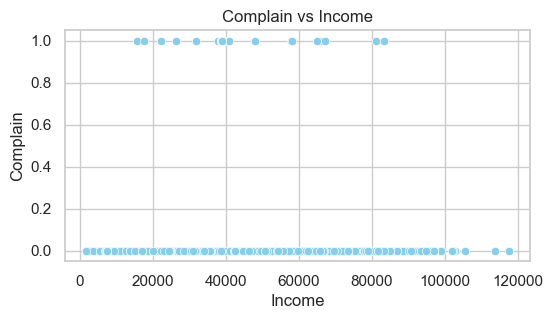

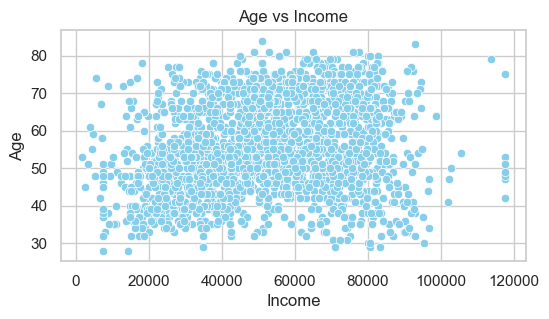

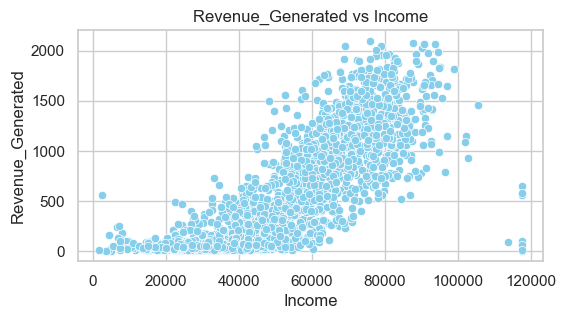

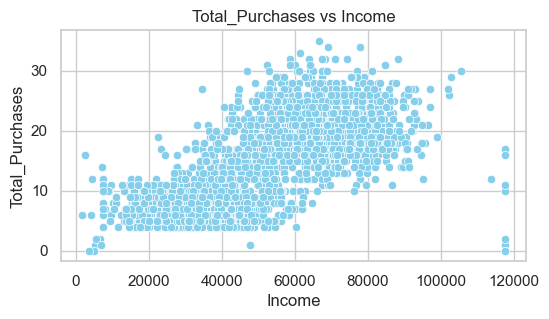

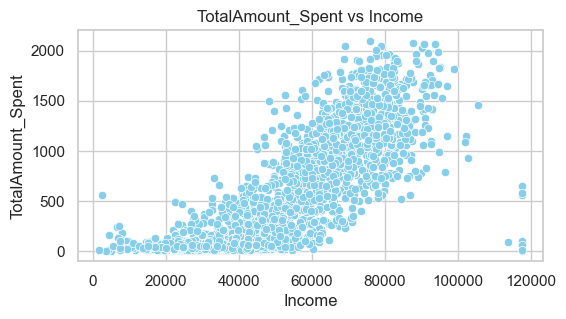

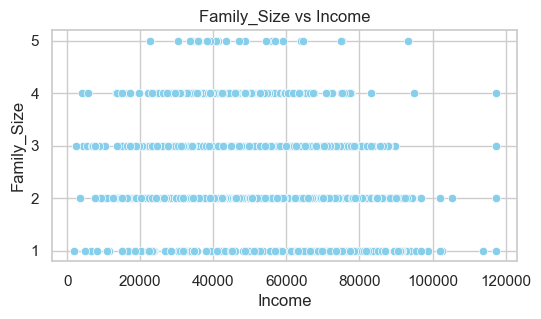

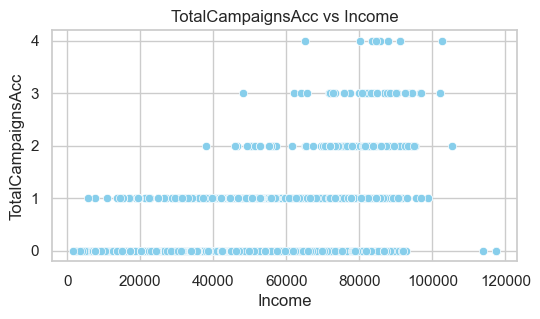

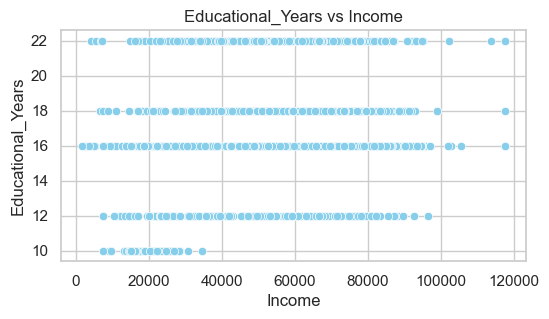

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop('Income')

for feature in numerical_features:
    plt.figure(figsize=(6, 3))
    sns.scatterplot(x=df['Income'], y=df[feature], color="skyblue"),
    plt.title(f'{feature} vs Income')
    plt.xlabel('Income')
    plt.ylabel(feature)
    plt.show()

- There doesn't appear to be a clear linear relationship between Year_Birth and Income.
- All 6 spending scatter plots (MntWines, MntFruits, MntMeatProducts,MntFishProducts, MntSweetProducts and MntGoldProds vs. Income) show a weak positive correlation, indicating a slight tendency for individuals with higher incomes to spend more on these product categories.
- The scatter plots between income and various purchasing variables (NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth) show weak or no correlations, indicating that income alone might not be a strong predictor of spending behavior.
-  There appears to be a strong positive correlation between Revenue Generated and Income. This suggests that as income increases, there is a general trend of higher revenue generation.
-  There appears to be a strong positive correlation between the TotalAmountSpent and Income. This suggests that as income increases, there is a general trend of higher spending.

<Axes: >

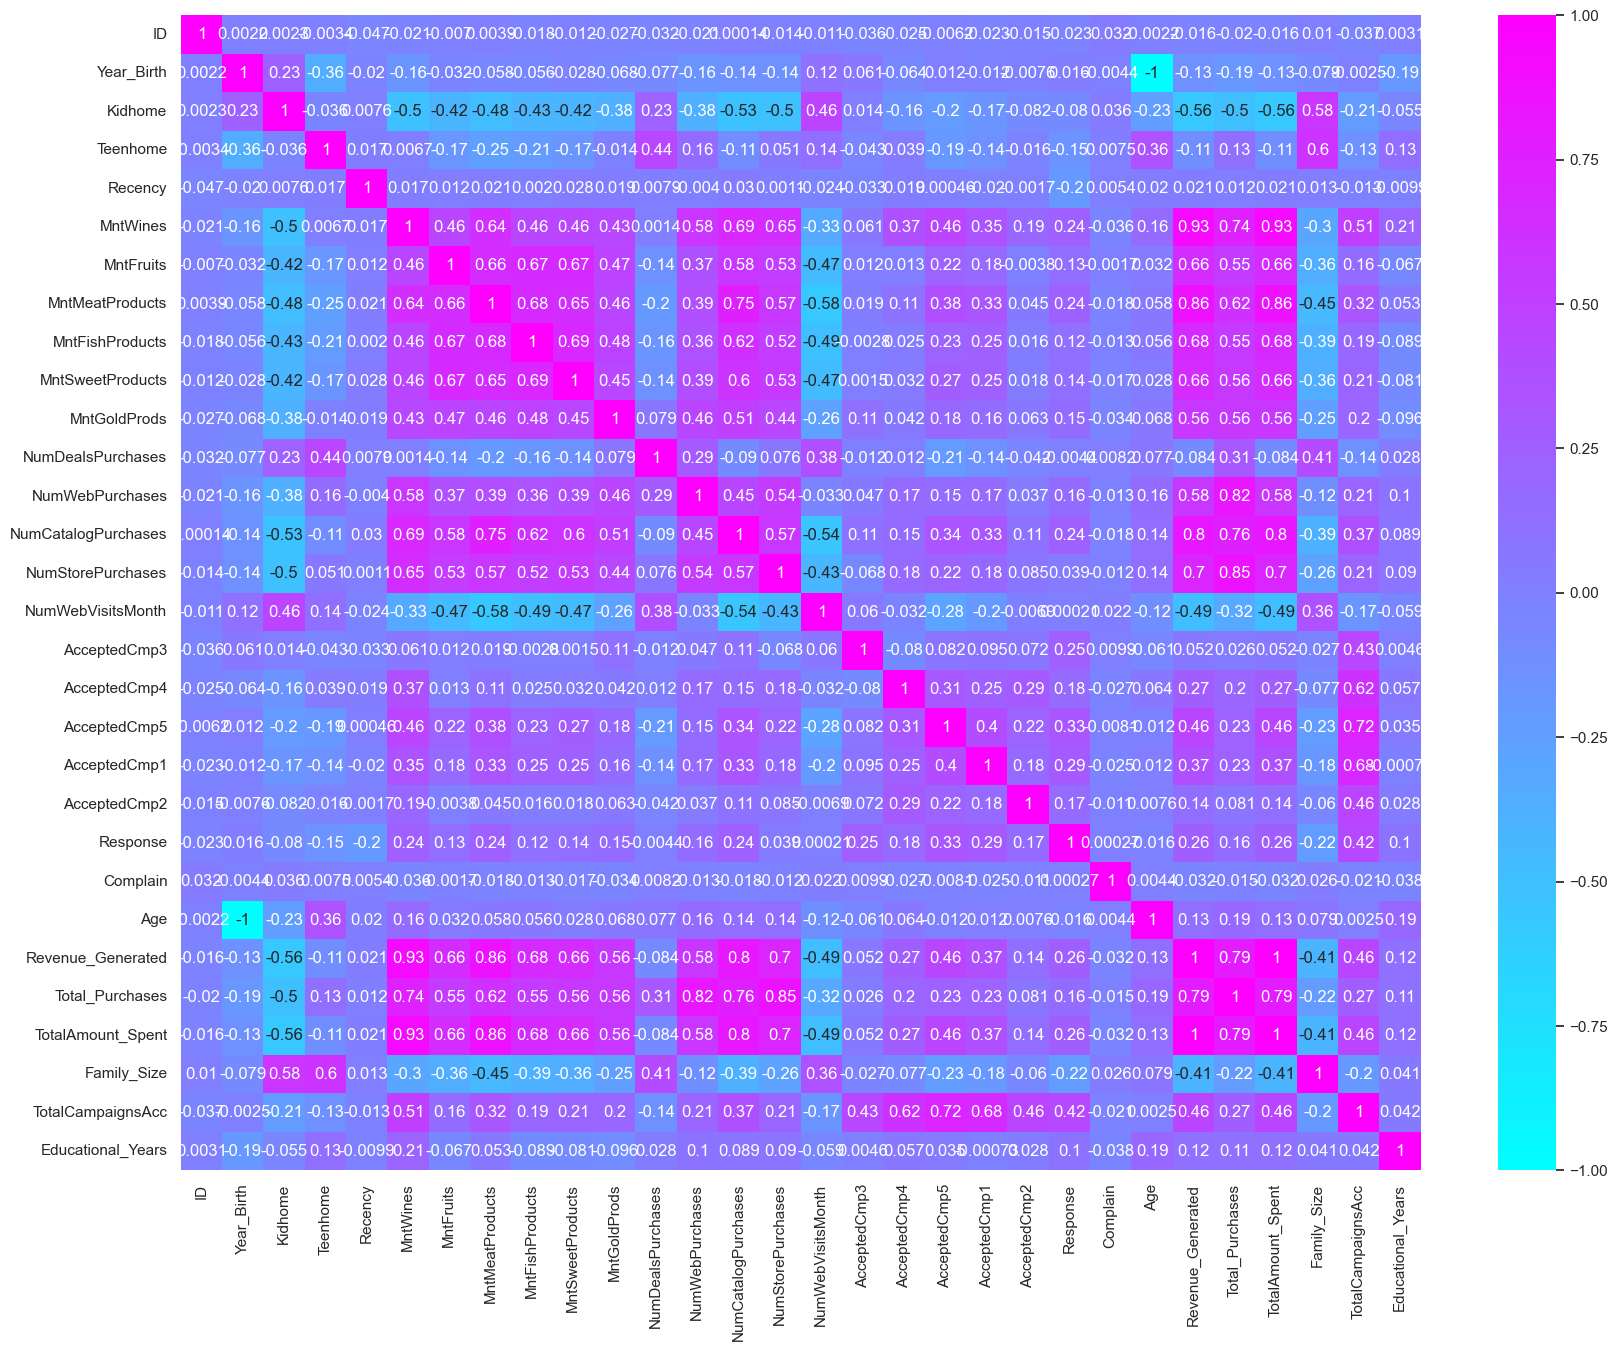

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df[numerical_features].corr(), cmap="cool", annot=True)

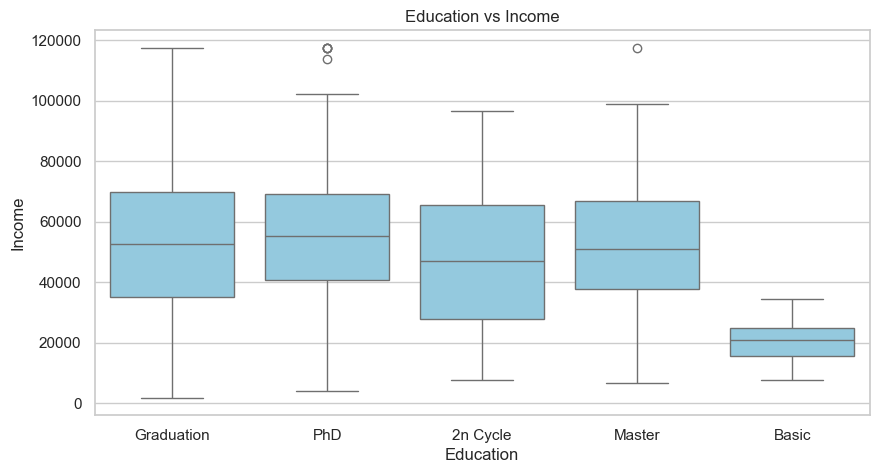

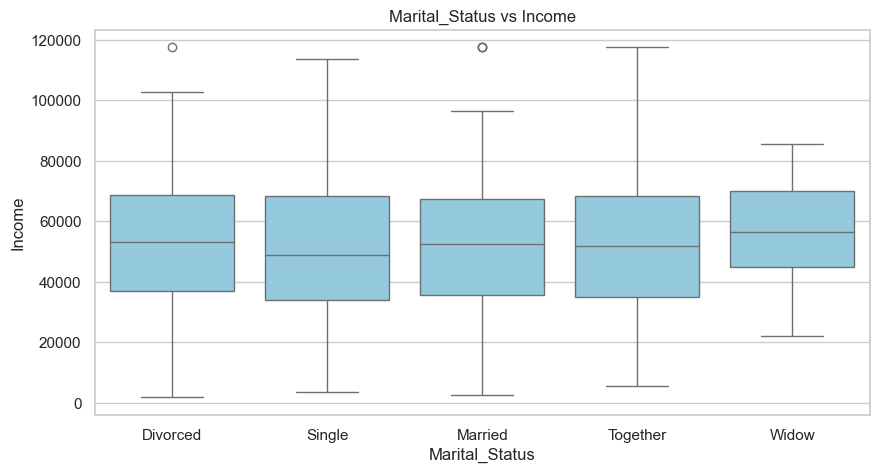

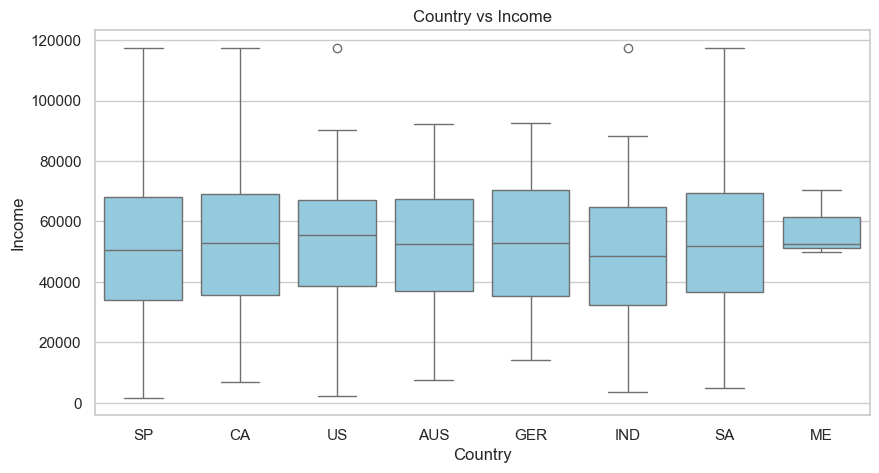

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[feature], y=df['Income'], color="skyblue")
    plt.title(f'{feature} vs Income')
    plt.xlabel(feature)
    plt.ylabel('Income')
    plt.show()

- Higher education levels are generally associated with higher median incomes, suggesting a positive relationship between education and earnings.
- While there are slight variations in median income across marital statuses, the overall distribution is relatively similar, indicating that marital status alone might not be a strong predictor of income.
- There are slight variations in median income across countries, but the overall distribution is comparable, suggesting that country-specific factors might have a limited impact on income.

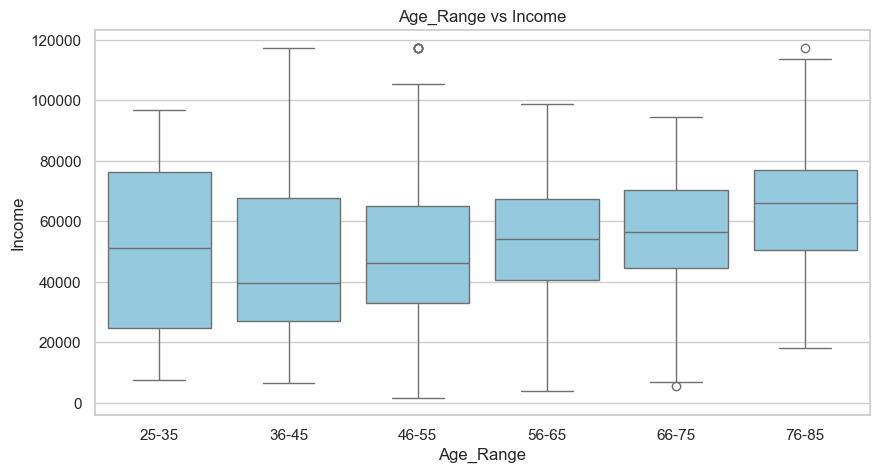

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Age_Range'], y=df['Income'], color="skyblue")
plt.title(f'Age_Range vs Income')
plt.xlabel('Age_Range')
plt.ylabel('Income')
plt.show()

- There appears to be a slight increase in median income as the age range increases, with the 76-85 age group showing the highest median income.
- A few outliers are present in some age ranges, suggesting the existence of individuals with unusually high or low incomes for their respective age groups.

## Data Exploration

#### Which marketing campaign is most successful?

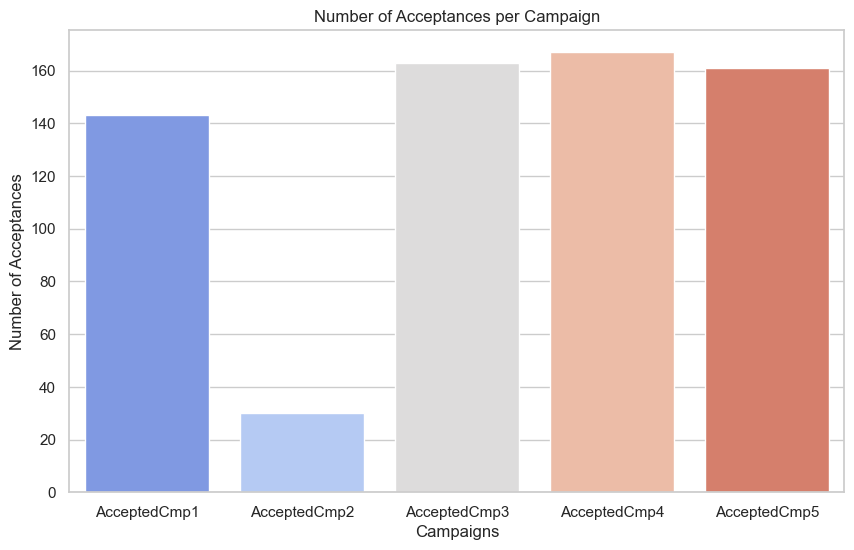

In [ ]:
sns.set(style="whitegrid")

campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
plt.figure(figsize=(10, 6))
sns.barplot(x=campaigns, y=df[campaigns].sum().values, palette="coolwarm")
plt.title('Number of Acceptances per Campaign')
plt.ylabel('Number of Acceptances')
plt.xlabel('Campaigns')
plt.show()

- campaign 2 received significantly lower acceptance rates compared to the others while a general trend towards increased acceptance rates from Campaign 3 onwards can be while. Campaign 4 has been the most successfull.
- The lower acceptance rates for Campaigns 1 and 2 might be attributed to less effective messaging, targeting, or other factors.

#### Display the total amount spent by a customer in each product category.

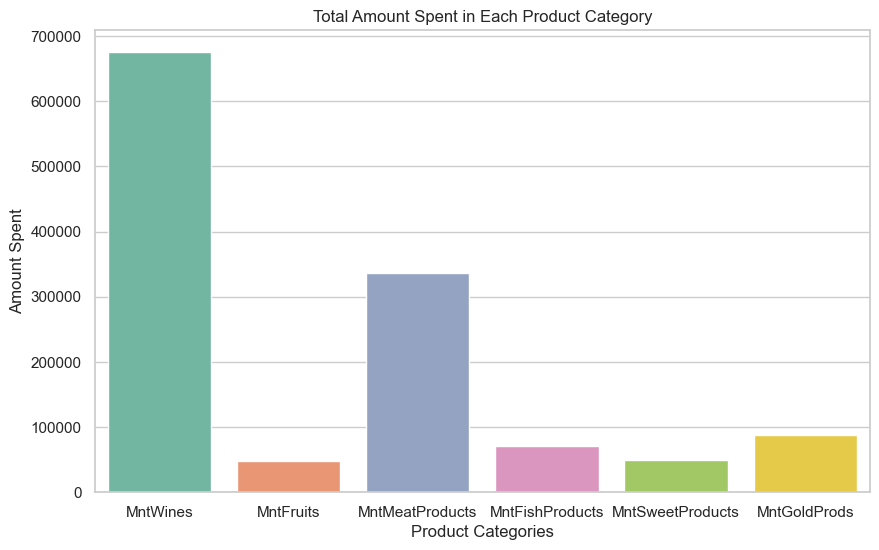

In [ ]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

plt.figure(figsize=(10, 6))
sns.barplot(x=product_columns, y=df[product_columns].sum().values, palette="Set2")
plt.title('Total Amount Spent in Each Product Category')
plt.ylabel('Amount Spent')
plt.xlabel('Product Categories')
plt.show()

- MntWines appears to be the most popular product category based on total spending.
- The lower spending on MntFruits, MntFishProducts, MntSweetProducts, and MntGoldProds might suggest that these categories have lower prices or are less frequently purchased.
- The varying spending patterns across product categories indicate potential customer segmentation based on preferences and budgets.

#### What is the average spending in each age group?

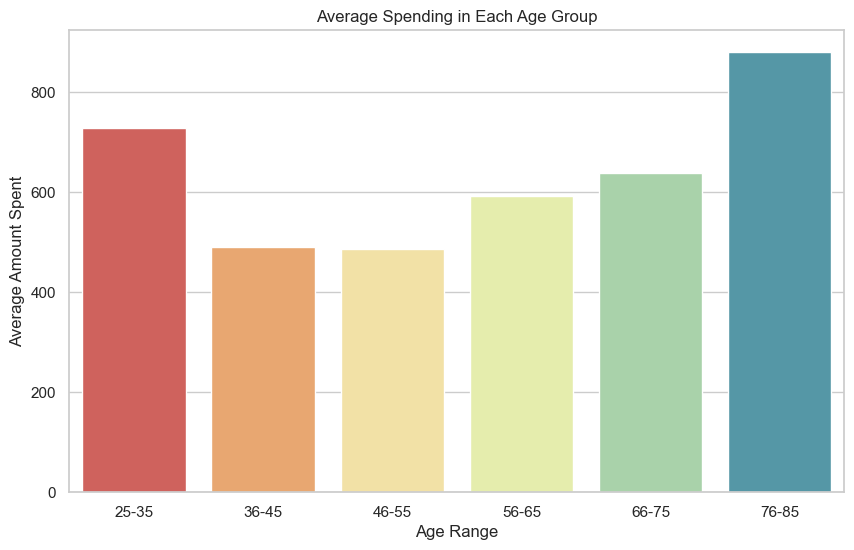

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df.groupby('Age_Range')['TotalAmount_Spent'].mean().index,
            y=df.groupby('Age_Range')['TotalAmount_Spent'].mean().values,
            palette="Spectral")
plt.title('Average Spending in Each Age Group')
plt.ylabel('Average Amount Spent')
plt.xlabel('Age Range')
plt.show()

- The age group 76-85 exhibits the highest average spending, suggesting a significant increase in expenditure among older consumers.
- As age decreases, the average spending generally declines, with the 28-35 age group showing the lowest average spending.
- The age groups 36-45, 46-55, and 56-65 demonstrate moderate levels of average spending.

#### Which products are performing best, and which are performing the least in terms of revenue?

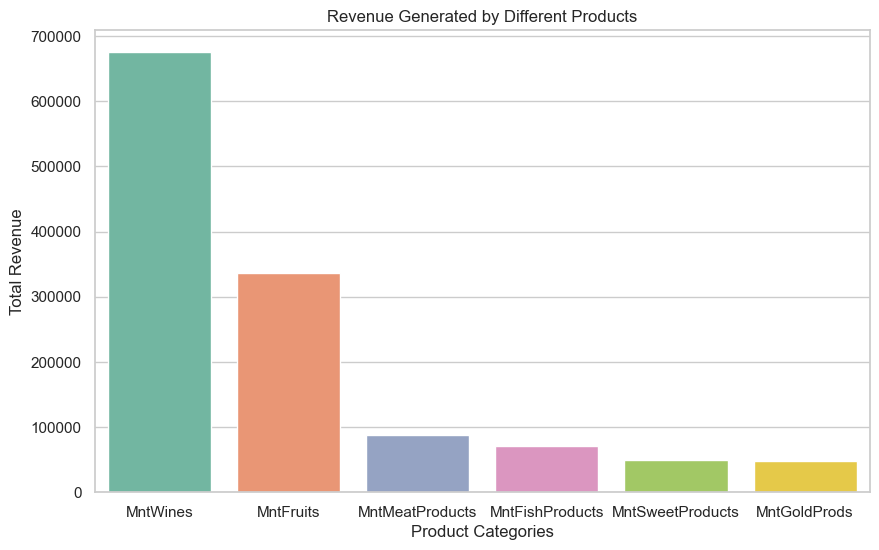

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=product_columns, y=df[product_columns].sum().sort_values(ascending=False).values, palette="Set2")
plt.title('Revenue Generated by Different Products')
plt.ylabel('Total Revenue')
plt.xlabel('Product Categories')
plt.show()


- MntWines: This product category generates the highest total revenue, indicating strong demand or higher pricing.
- MntFruits: The second highest revenue-generating category, suggesting a considerable market share.
- MntMeatProducts, MntFishProducts, MntSweetProducts, and MntGoldProds: These categories have significantly lower revenue, suggesting less demand or lower pricing.


#### Which Country has the greatest number of customers who accepted the last campaign.

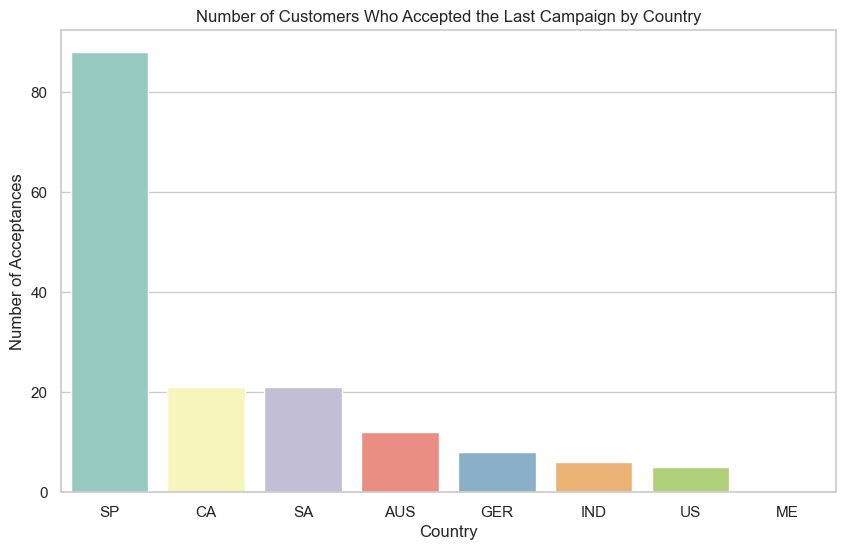

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df.groupby('Country')['AcceptedCmp5'].sum().sort_values(ascending=False).index,
            y=df.groupby('Country')['AcceptedCmp5'].sum().sort_values(ascending=False).values,
            palette="Set3")
plt.title('Number of Customers Who Accepted the Last Campaign by Country')
plt.ylabel('Number of Acceptances')
plt.xlabel('Country')
plt.show()

- Highest Acceptance Rate: Spain (SP) has the highest number of customers who accepted the last campaign, indicating strong campaign performance in this region.
- Moderate Acceptance: Countries like CA, SA, and AUS demonstrated moderate acceptance rates, suggesting that the campaign resonated with a significant portion of customers in these regions.
- Lower Acceptance: GER, IND, US, and ME had relatively lower acceptance rates, indicating that the campaign's impact was less pronounced in these countries.

### Feature Encoding for ML model

In [ ]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Month  Day  Age  Age_Range  \
0  2014-06-16        0     189.0  ...      6   16   54      46-55   
1  2014-06-15        0     464.0  ...      6   15   63      56-65   
2  2014-05-13        0     134.0  ...      5   13   66      66-75   
3  2014-05-11        0      10.0  ...      5   11   57      56-65   
4  2014-04-08        0       6.0  ...      4    8   35      36-45   

   Revenue_Generated  Total_Purchases  TotalAmount_Spent  Family_Size  \
0              967.5             15.0              967.5            1   
1              577.0             18.0              577.0            1   
2              251.0             11.0              251.0            3   
3               11.0              4.0               11.0            4   
4               91.0              8.0               91.0            2   

   TotalCampaignsAcc  Educational_Years  
0                  0                 16  
1                  1                 16  
2                  0                 16  
3                  0                 16  
4                  1                 16  

[5 rows x 39 columns]

In [ ]:
df= pd.get_dummies(df, columns=['Education', 'Marital_Status', 'Country','Age_Range'], drop_first=True)
df = df.astype(int)

In [ ]:
df.drop(['Year_Birth','Kidhome','Teenhome','Dt_Customer','Age'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2235 entries, 0 to 2239
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   ID                       2235 non-null   int64
 1   Income                   2235 non-null   int64
 2   Recency                  2235 non-null   int64
 3   MntWines                 2235 non-null   int64
 4   MntFruits                2235 non-null   int64
 5   MntMeatProducts          2235 non-null   int64
 6   MntFishProducts          2235 non-null   int64
 7   MntSweetProducts         2235 non-null   int64
 8   MntGoldProds             2235 non-null   int64
 9   NumDealsPurchases        2235 non-null   int64
 10  NumWebPurchases          2235 non-null   int64
 11  NumCatalogPurchases      2235 non-null   int64
 12  NumStorePurchases        2235 non-null   int64
 13  NumWebVisitsMonth        2235 non-null   int64
 14  AcceptedCmp3             2235 non-null   int64
 15  AcceptedC

In [ ]:
df.head()

ID  Income  Recency  MntWines  MntFruits  MntMeatProducts  \
0   1826   84835        0       189         81              379   
1      1   57091        0       464          5               64   
2  10476   67267        0       134         11               59   
3   1386   32474        0        10          0                1   
4   5371   21474        0         6         16               24   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  ...  \
0              111                81           126                  1  ...   
1                7                 0            37                  1  ...   
2               15                 2            30                  1  ...   
3                0                 0             0                  1  ...   
4               11                 0            34                  2  ...   

   Country_IND  Country_ME  Country_SA  Country_SP  Country_US  \
0            0           0           0           1           0   
1            0           0           0           0           0   
2            0           0           0           0           1   
3            0           0           0           0           0   
4            0           0           0           1           0   

   Age_Range_36-45  Age_Range_46-55  Age_Range_56-65  Age_Range_66-75  \
0                0                1                0                0   
1                0                0                1                0   
2                0                0                0                1   
3                0                0                1                0   
4                1                0                0                0   

   Age_Range_76-85  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 50 columns]

# Overall Insights and Recommendations

## Insights

- The income distribution is highly skewed, indicating that most customers earn less than the mean income, with a smaller segment earning significantly more.
- Age distribution shows a concentration in specific age groups(25-35 and 76-85), suggesting that the core customer base is within a particular demographic.
- Certain product categories (e.g., MntWines, MntMeatProducts) show higher median spending, indicating these are popular and high-revenue categories.
- Boxplots reveal the presence of outliers, likely high-value customers who spend significantly more than the average on these products.
- Certain campaigns have higher acceptance rates(3,4 and 5), indicating what resonates most with customers.
- Campaigns with lower response rates(1 and 2) suggest that those strategies or offers might not have been as appealing or relevant to the target audience.
- Customers exhibit a moderate level of engagement across all channels, with a few outliers indicating high-spending customers.
- Strong correlations between income and spending suggest that income is a major driver of customer value.
- Positive correlations between spending in certain product categories (e.g., wines and meats) indicate cross-selling opportunities.
- Segmenting customers based on factors such as income, age, and spending behavior reveals distinct groups that can be targeted with specific marketing strategies. For example, younger customers might prefer online shopping, while older customers might favor in-store experiences.
- Outliers in spending or income data might represent high-value customers, but could also indicate data entry errors or unique, non-representative cases.


## Recommendations

- Targeted Marketing: Tailor marketing campaigns and product offerings to the most prominent age groups and income levels. For instance, offering mid-range products and discounts could appeal to the larger lower-to-middle-income customer base.
- Upselling Opportunities: For the higher-income segment, consider introducing premium product lines or exclusive offers to capitalize on their spending potential.
- Product Focus: Focus on promoting and expanding the product lines that show higher spending. For example, introducing premium variants or bulk purchase discounts for popular categories could boost sales.
- High-Value Customer Retention: Develop loyalty programs or personalized offers for high-spending customers (outliers) to retain and increase their lifetime value.
- Refine Campaigns: Analyze the successful campaigns to understand what elements (e.g., discounts, product bundles, timing) contributed to their success, and replicate these features in future campaigns.
- Revise or Retire Ineffective Campaigns: For campaigns with low response rates,such as campaign 2, consider revising the offers or targeting different segments. Alternatively, these campaigns could be phased out in favor of more effective strategies.
- Enhance the Leading Channel: Invest in improving the website’s and in-store user experience, introducing features like personalized recommendations, faster checkout, and targeted ads.
- Income-Based Segmentation: Use income levels to segment your customers and tailor your marketing and sales strategies accordingly. High-income customers could be targeted with premium offers, while lower-income segments might respond better to discounts and budget-friendly products.
- Cross-Selling Opportunities: Design marketing campaigns that bundle highly correlated products (e.g., offering discounts on meat products when purchasing wine) to increase average order value.
- Personalized Marketing: Develop targeted marketing campaigns for each segment. For example, younger, tech-savvy customers might be more responsive to social media and email marketing, while older customers might prefer traditional methods like direct mail or phone calls.
- Seasonal Promotions: Align marketing efforts with periods of high web activity, offering time-sensitive discounts or exclusive online content during these peaks.

